# External modules

In [2]:
library(tidyverse)
library(readr)
library(DescTools)
library(Hmisc)

# Internal functions

In [3]:
path <- ".."

xfun::in_dir(dir = path, expr = source("./src/impute_outliers.R"))
xfun::in_dir(dir = path, expr = source("./src/extract_nlargest_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/extract_block_maxima.R"))
xfun::in_dir(dir = path, expr = source("./src/extract_block_maxima_with_indexes.R"))

xfun::in_dir(dir = path, expr = source("./src/get_standard_scaled_data.R"))
xfun::in_dir(dir = path, expr = source("./src/get_one_hot_encoded_data.R"))
xfun::in_dir(dir = path, expr = source("./src/get_one_hot_encoded_and_standard_scaled_data.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_modes.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_modes.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_gev_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_gev_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_gev_parameters.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_gev_model_quantile.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_single_gev_model.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_several_gev_models.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_ns_gev_parameters.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_single_ns_gev_model.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_several_ns_gev_models.R"))

xfun::in_dir(dir = path, expr = source("./src/get_ns_gev_model_normalized_parameters.R"))
xfun::in_dir(dir = path, expr = source("./src/get_several_ns_gev_model_normalized_parameters.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_gev_mixture_model_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_several_standardized_block_maxima_mean.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_several_ns_standardized_block_maxima_mean.R"))

xfun::in_dir(dir = path, expr = source("./src/plot_several_standardized_block_maxima_mean.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_several_ns_standardized_block_maxima_mean.R"))

xfun::in_dir(dir = path, expr = source("./src/fit_stationary_gev_mixture_model.R"))
xfun::in_dir(dir = path, expr = source("./src/fit_non_stationary_gev_mixture_model.R"))

xfun::in_dir(dir = path, expr = source("./src/plot_fit_stationary_gev_mixture_model.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_fit_non_stationary_gev_mixture_model.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_stationary_gev_mixture_model_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_stationary_gev_mixture_model_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_stationary_gev_mixture_model_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_stationary_gev_mixture_model_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_non_stationary_gev_mixture_model_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_non_stationary_gev_mixture_model_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_non_stationary_gev_mixture_model_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_non_stationary_gev_mixture_model_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_stationary_gev_mixture_model_quantile.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_non_stationary_gev_mixture_model_quantile.R"))

xfun::in_dir(dir = path, expr = source("./src/plot_estimate_stationary_gev_mixture_model_quantile.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_estimate_non_stationary_gev_mixture_model_quantile.R"))


Loading required package: lattice


Attaching package: ‘caret’


The following objects are masked from ‘package:DescTools’:

    MAE, RMSE


The following object is masked from ‘package:purrr’:

    lift




In [4]:
options(repr.plot.width=19, repr.plot.height=12)

# Data

In [11]:
data <- xfun::in_dir(dir = path, expr = read_csv("./04_experimentation_03/final_dataset.csv"))
#data <- xfun::in_dir(dir = path, expr = read.csv("./04_experimentation_03/localization_errors.csv", sep =";"))

In [12]:
str(data)

'data.frame':	35083 obs. of  4 variables:
 $ timestamp         : num  1.77e+09 1.77e+09 1.77e+09 1.77e+09 1.77e+09 ...
 $ lateral_error     : num  2.65 2.61 2.61 2.58 2.6 ...
 $ longitudinal_error: num  -0.0246 -0.0285 -0.0317 -0.0294 -0.0266 ...
 $ haversine_error   : num  2.65 2.6 2.61 2.58 2.59 ...


## Response variable

In [13]:
x_raw <- data$lateral_error_abs
#x_raw <- abs(data$lateral_error)

In [14]:
coefficient_iqr <- 9
method <- c("interpolate", "mode", "median", "mean")[1]

In [15]:
x_raw_object <- impute_outliers(x = x_raw, coefficient_iqr = coefficient_iqr, method = method)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [16]:
print(names(x_raw_object))

[1] "outlier_values"      "outlier_positions"   "outlier_substitutes"
[4] "method"              "coefficient_iqr"     "imputed_data"       
[7] "raw_data"           


In [17]:
outlier_positions <- x_raw_object$outlier_positions

In [18]:
print(outlier_positions)

 [1] 23586 23587 23588 23589 23590 23591 23592 23593 23594 23595 23596 23597
[13] 23598 23599 23600 23601 23602 23603 23604 23605 23606 23607 23608 23609
[25] 23610 23611 23612 23613 23614 23615 23616 23617 23618 23619 23620 23621
[37] 23622 23623 23624 23625 23626 23627 23628 23629 23630 23631 23632 23633
[49] 23634 23635 23636 23637 23638 23639 23640 23641 23642 23643 23644 23645
[61] 23646 23647 23648 23649 23650 23651 23652 23672 23673 23674 23675 23676


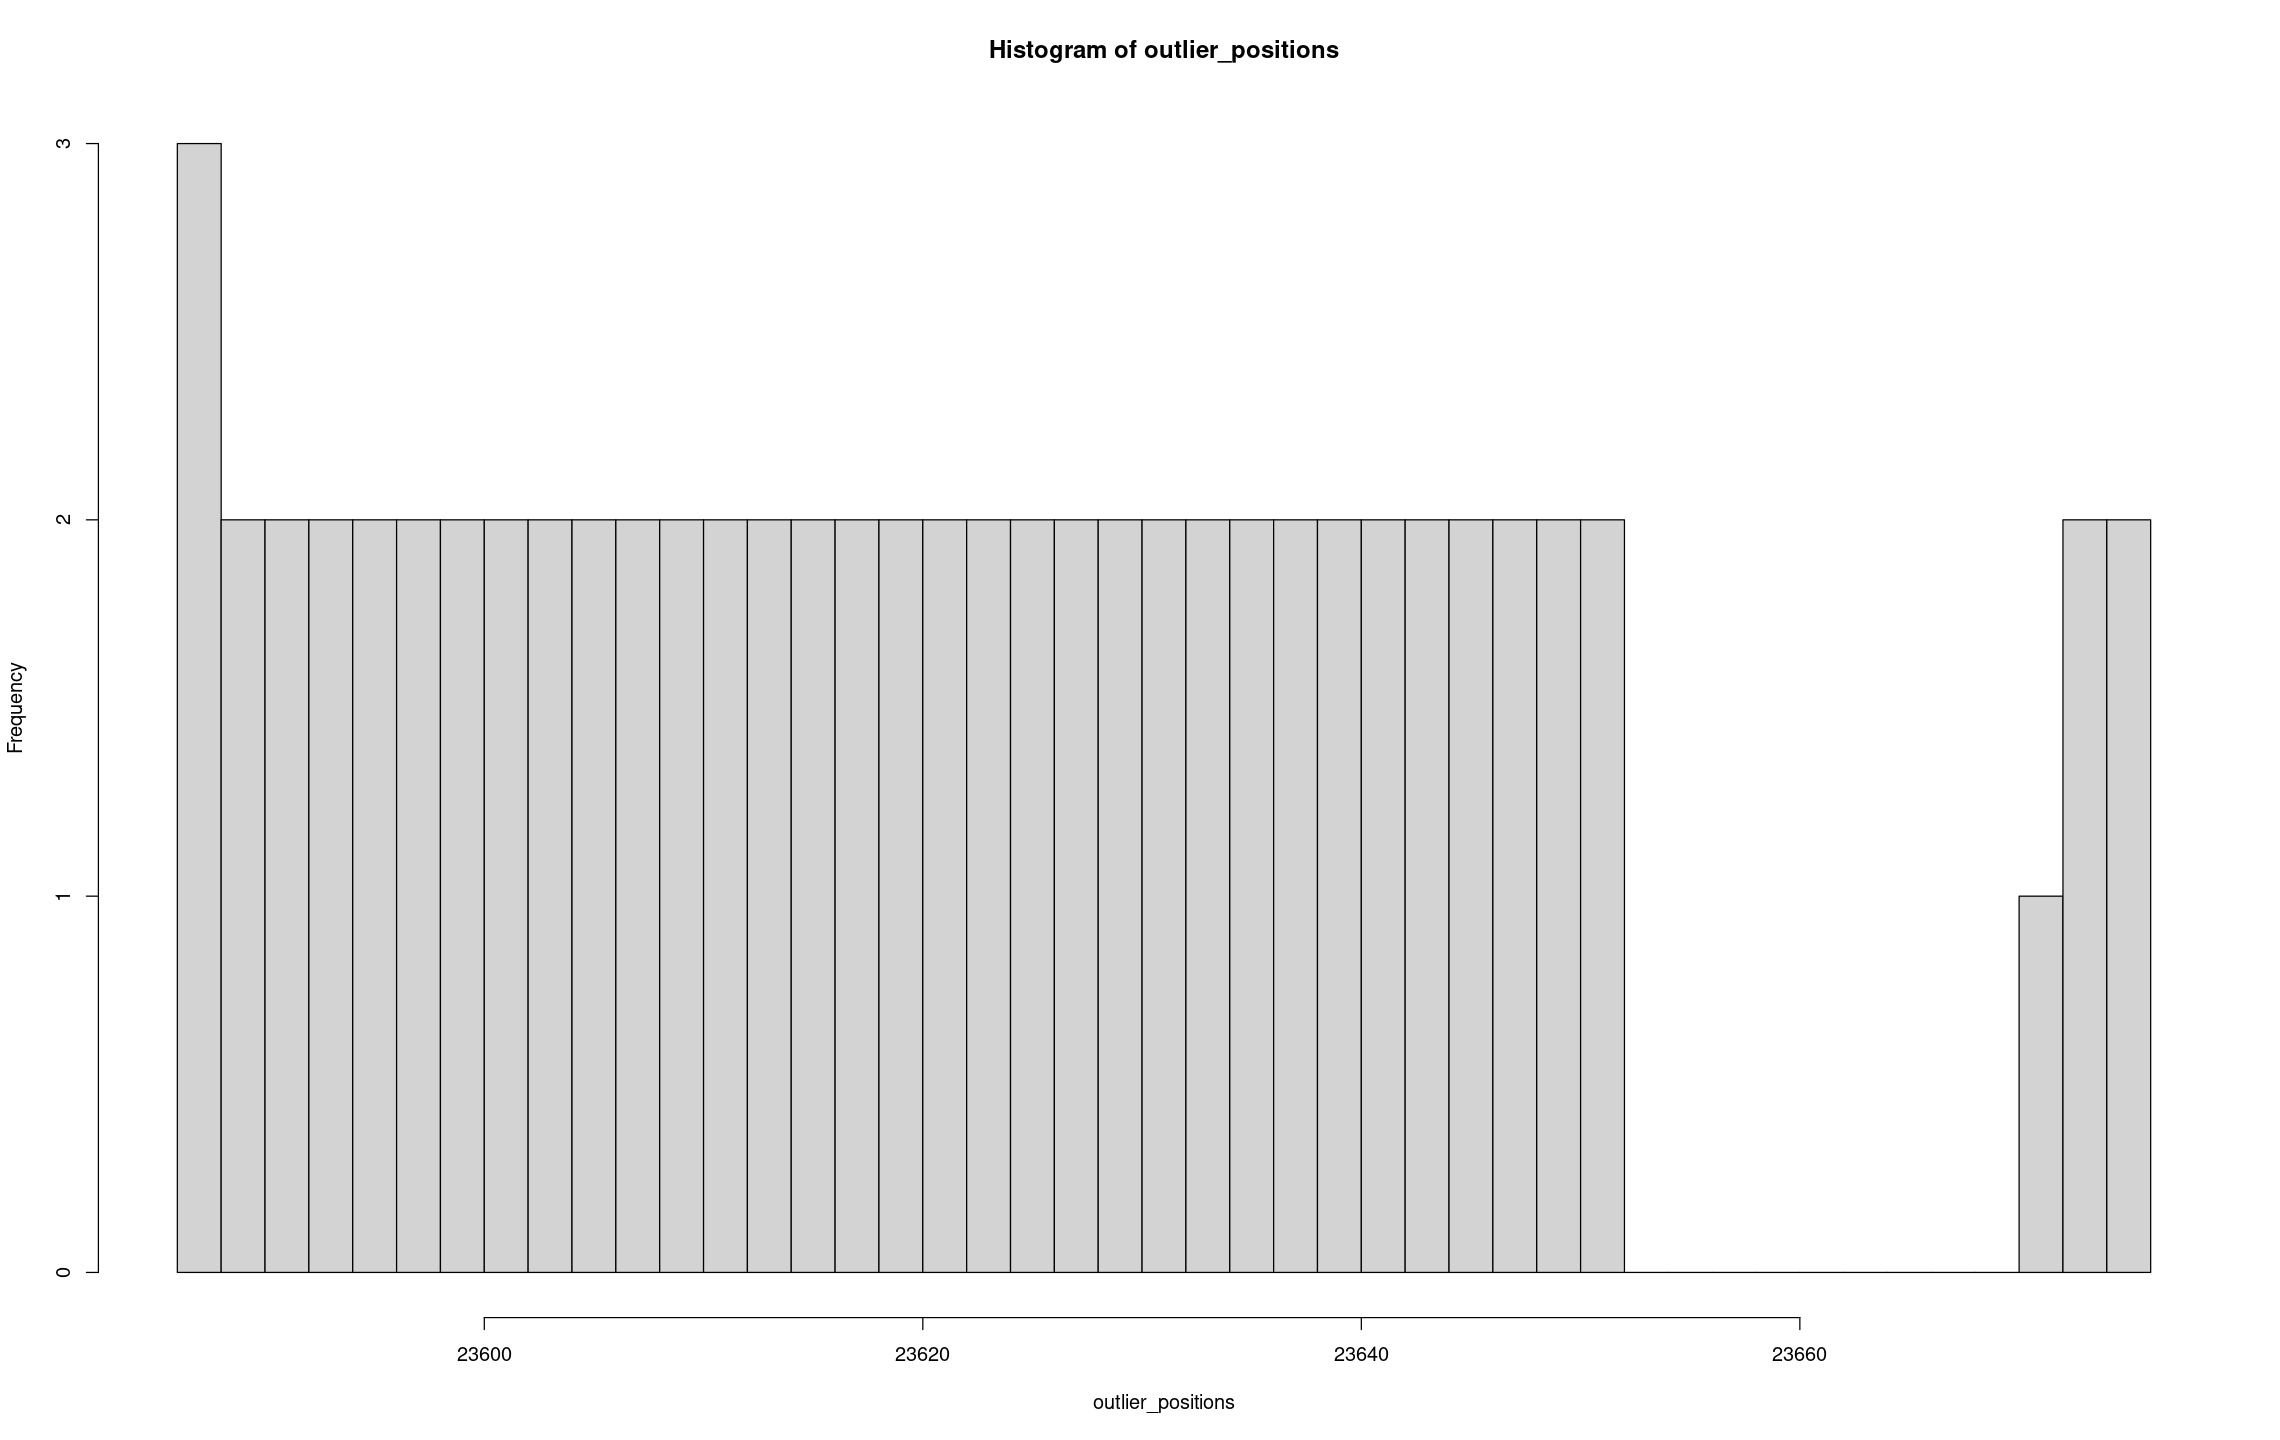

In [19]:
options(repr.plot.width=19, repr.plot.height=12)

hist(outlier_positions, nclass = 50)

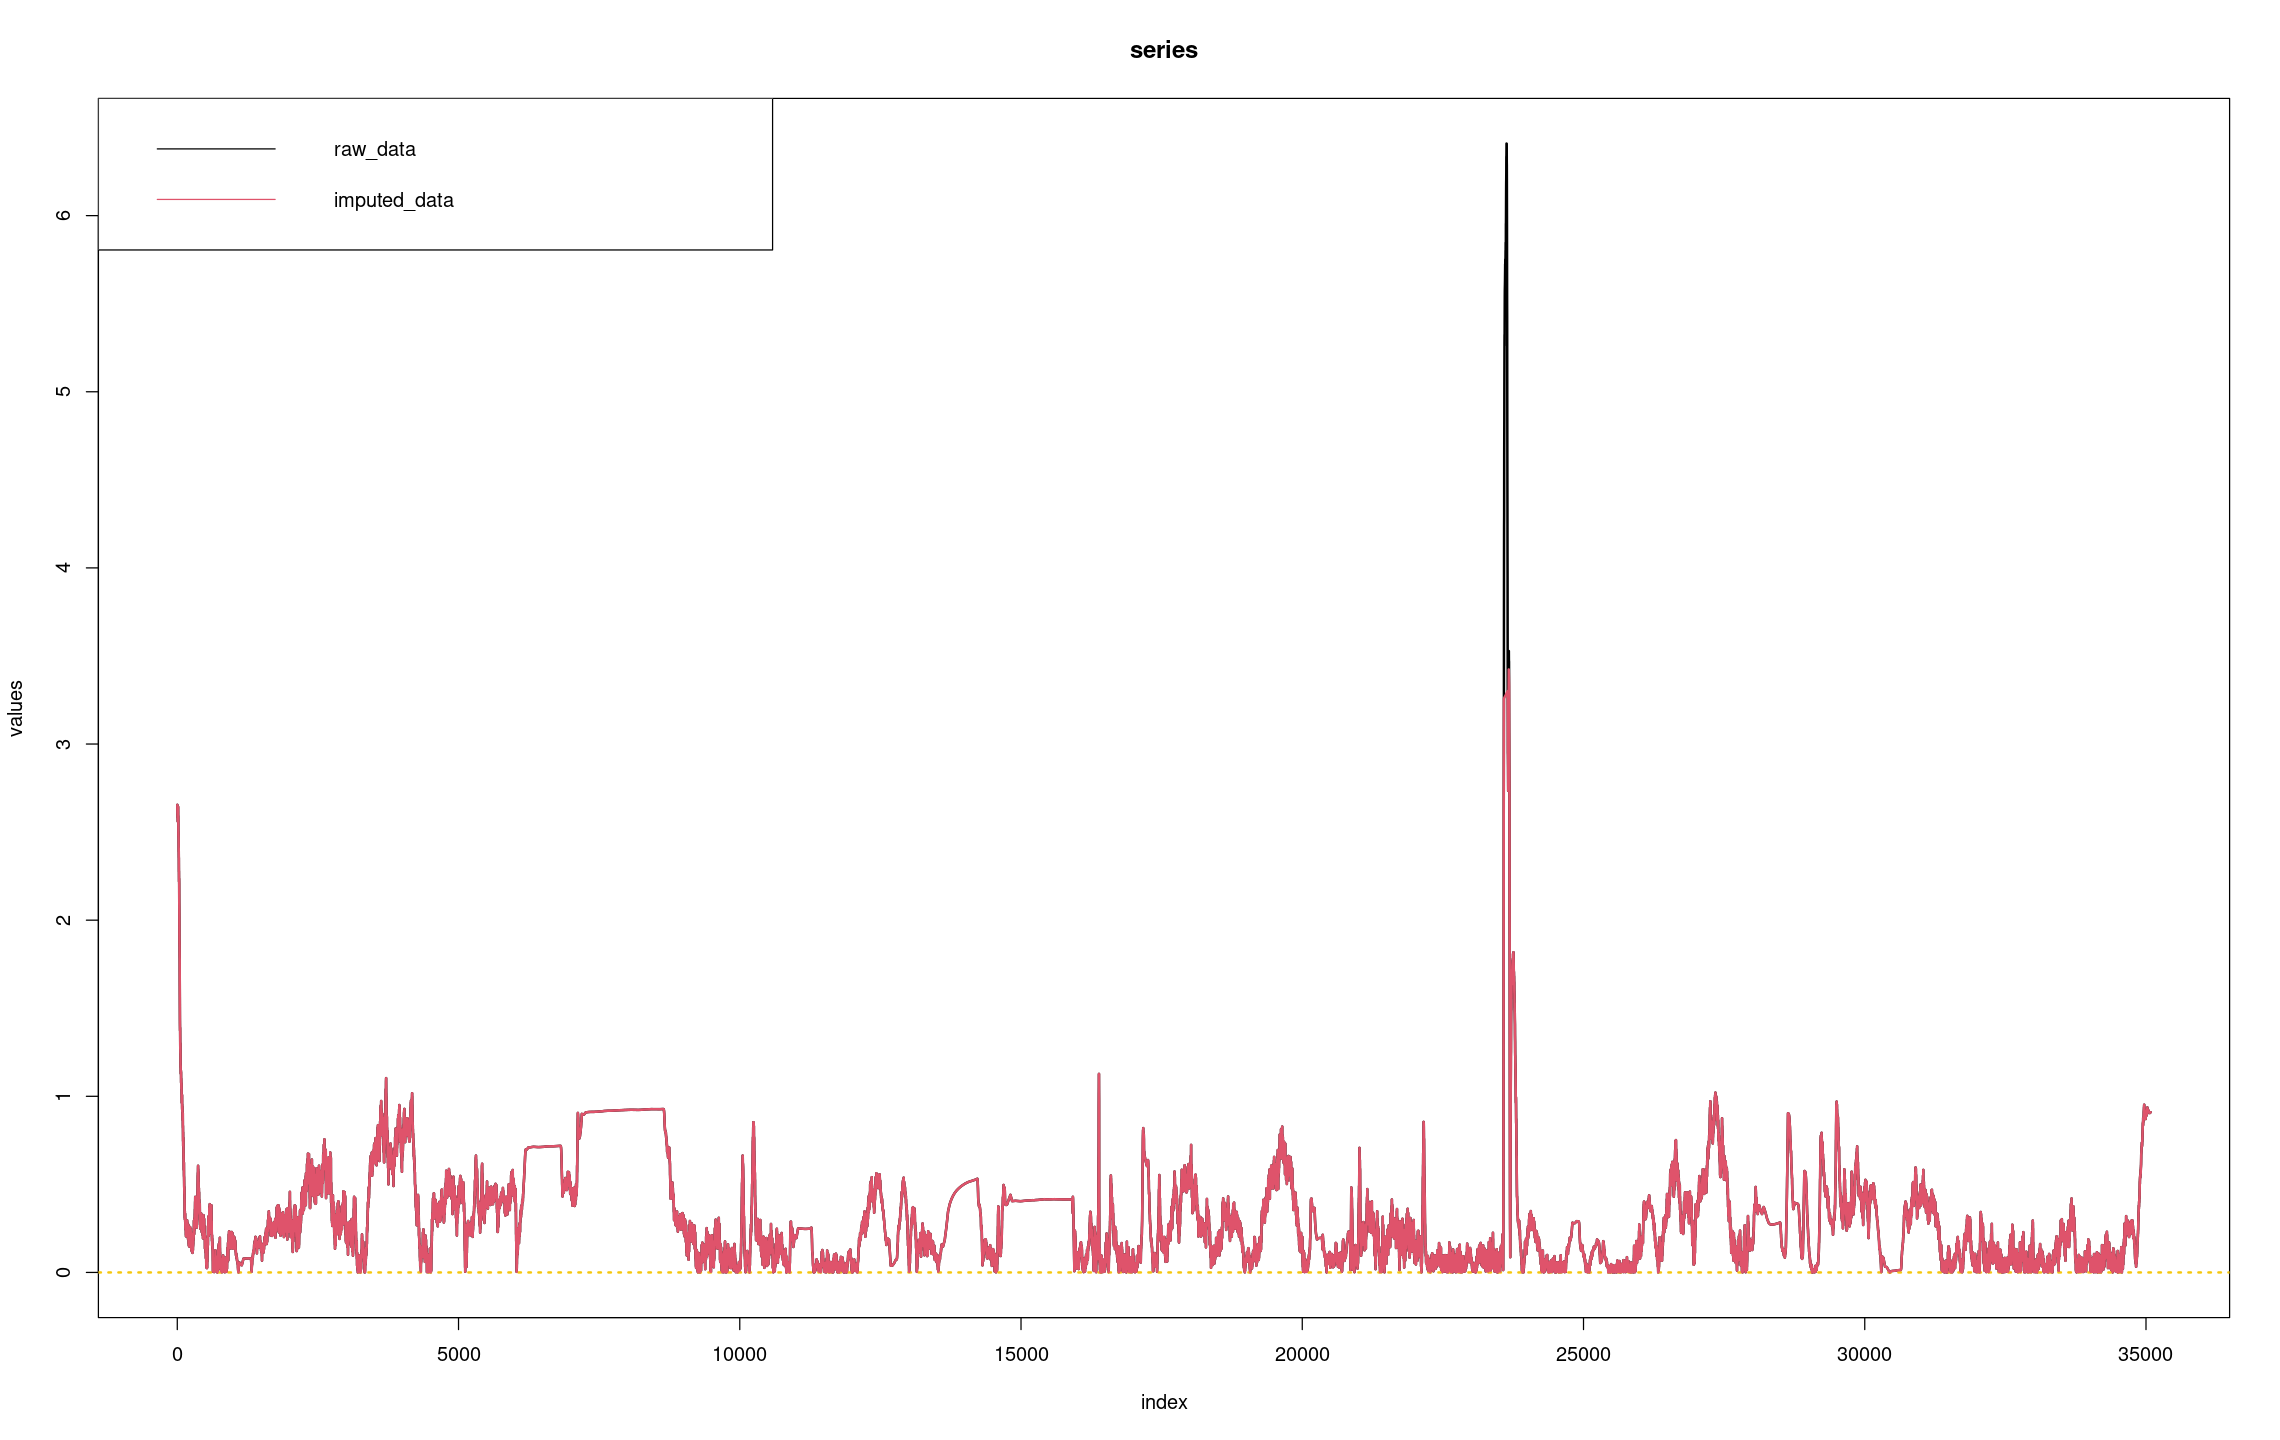

In [20]:
options(repr.plot.width=19, repr.plot.height=12)

plot(x_raw_object$raw_data, 
     type = "l", 
     lwd = 2, 
     ylab = "values", 
     xlab = "index",
    main = "series")
abline(h = 0, lty = "dotted", col = 7, lwd = 2)
lines(x_raw_object$imputed_data, col = 2, lwd = 2)
legend("topleft", legend = c("raw_data", "imputed_data"), col = c(1, 2), lty = 1:1, cex = 1)

In [21]:
# data with imputed outliers
x <- x_raw_object$imputed_data 
data_clean <- data
n <- length(x)

In [22]:
# data with removed outliers
# x <- x_raw[-outlier_positions]
# n <- length(x)
# data_clean <- data[-outlier_positions, ]

------------------------------------------------------------------------------ 
x (numeric)

           length                n              NAs           unique'
           35'083           35'083                0           34'272
                            100.0%             0.0%                 
                                                                    
              .05              .10              .25           median
  0.0146465367638  0.0313941791653  0.0880981609225  0.2359707355500
                                                                    
            range               sd            vcoef              mad
  3.4234461620679  0.3120329771662  1.0130452155957  0.2470530940221
                                                                    
               0s             mean            meanCI
                0  0.3080148569506   0.3047496161997
             0.0%                    0.3112800977015
                                                    
    

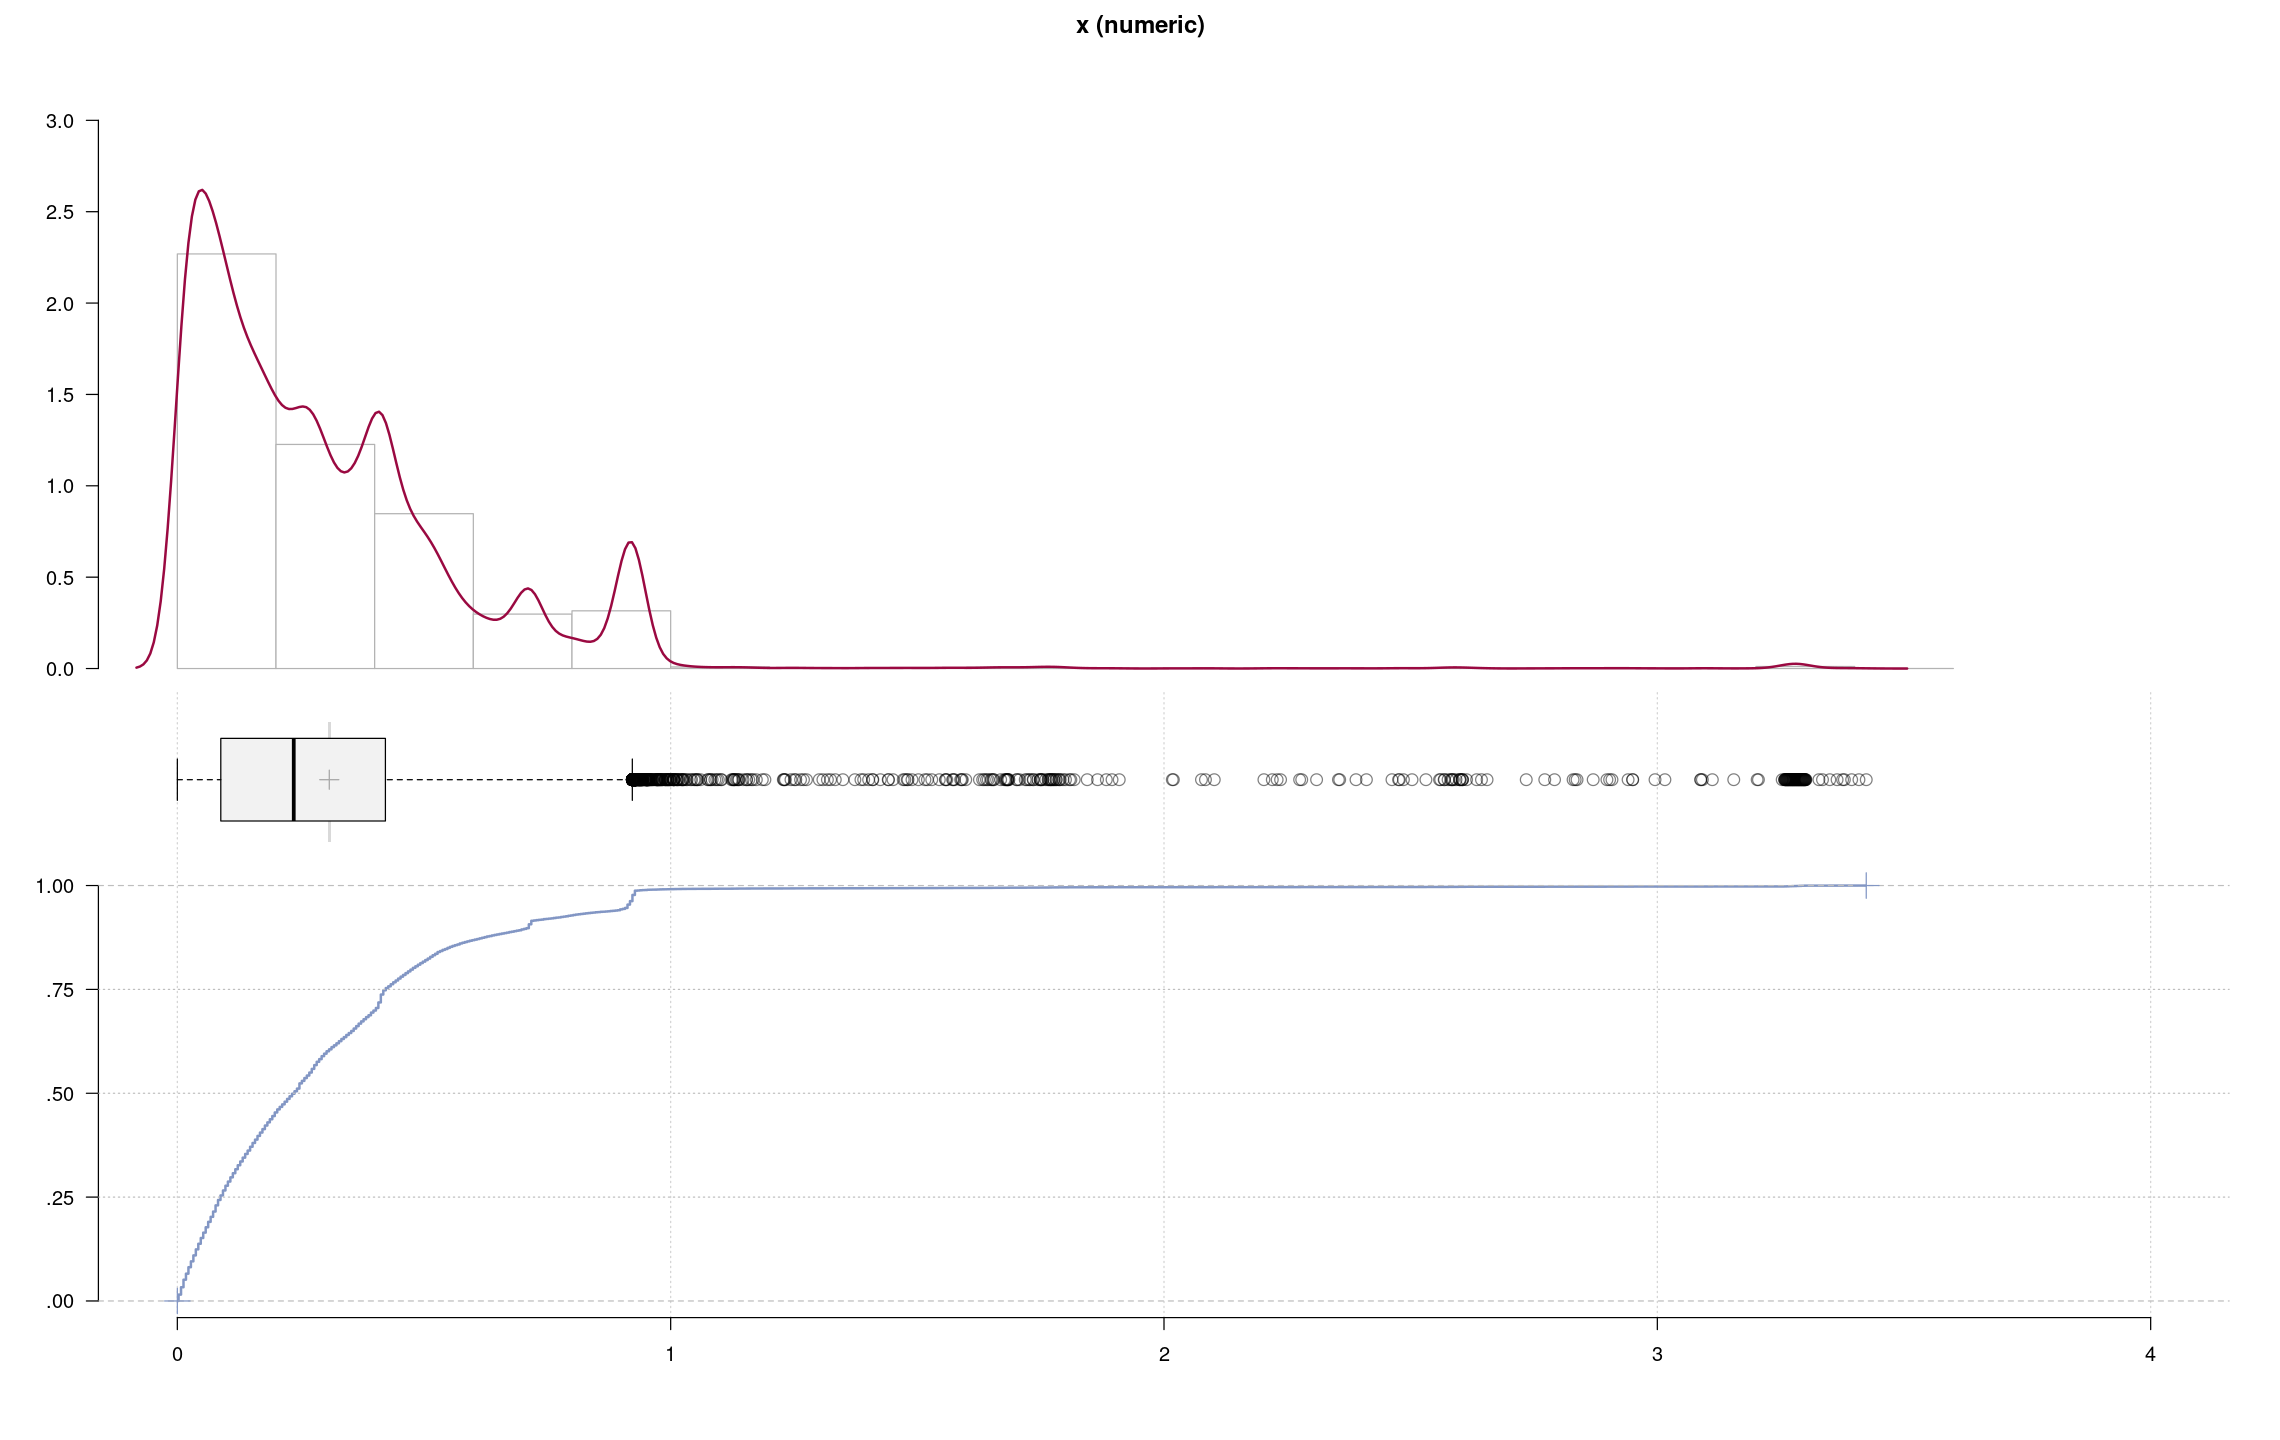

In [23]:
options(repr.plot.width=19, repr.plot.height=12)

Desc(x)

In [17]:
# options(repr.plot.width=19, repr.plot.height=12)
# 
# nlargest <- 3000
# y <- extract_nlargest_sample(x, n = nlargest)
# Desc(y)

## Predictor variables

In [18]:
# # select the predictor variables
# data_covariates <- data_clean %>% select(!c(timestamp, latitude, longitude, velocity_latitude, velocity_longitude,
#                                             lateral_error, longitudinal_error, haversine_error, latitude_error,
#                                             longitude_error, heading_error, lateral_error_abs, longitudinal_error_abs,
#                                             haversine_error_abs, latitude_error_abs, longitude_error_abs, heading_error_abs))
# 
# str(data_covariates)

In [24]:
# select the predictor variables
data_covariates <- data_clean %>% select(c(velocity, object, area))

str(data_covariates)

ERROR: [1m[33mError[39m in `select()`:[22m
[33m![39m Can't subset columns that don't exist.
[31m✖[39m Column `velocity` doesn't exist.


In [20]:
# Remove columns containing only zeros
# data_covariates_clean <- data_covariates %>% select(where(~ sum(.) != 0))
data_covariates_clean <- data_covariates %>% select_if(colSums(.) != 0)

str(data_covariates_clean)

tibble [22,846 × 3] (S3: tbl_df/tbl/data.frame)
 $ velocity: num [1:22846] 5.00e-11 3.89e-11 3.79e-11 4.93e-11 4.09e-11 ...
 $ object  : num [1:22846] 20 23 27 19 24 25 24 23 25 21 ...
 $ area    : num [1:22846] 0.555 0.745 0.603 0.376 0.383 ...


In [21]:
# describe(data_covariates_clean)

In [22]:
# scale all predictors variables

data_covariates_clean_scaled <- get_standard_scaled_data(data_covariates_clean, newdata = NULL)

str(data_covariates_clean_scaled)

'data.frame':	22846 obs. of  3 variables:
 $ velocity: num  -0.546 -0.788 -0.809 -0.56 -0.743 ...
 $ object  : num  -1.213 -0.946 -0.589 -1.302 -0.857 ...
 $ area    : num  -1.098 -0.525 -0.955 -1.638 -1.618 ...


# Model selection

## Candidate block sizes

In [23]:
minimum_block_size <- find_minimum_block_size(x, threshold = min(x))

print(minimum_block_size)

[1] 3


In [24]:
maximum_block_size <- find_block_size_associated_with_given_number_of_blocks(x, m = 50)

print(maximum_block_size)

[1] 456


In [25]:
maxima <- extract_block_maxima(x, block_size = minimum_block_size)

print(min(maxima))

[1] 0.002079647267


In [26]:
print(median(x))

[1] 0.3255155981


In [27]:
print(calculate_mode(x))

[1] 0.1249717706


In [28]:
candidate_block_sizes <- get_candidate_block_sizes(x, threshold = min(x), m = 50)

print(candidate_block_sizes)

  [1]   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20
 [19]  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38
 [37]  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56
 [55]  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
 [73]  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
 [91]  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
[109] 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
[127] 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
[145] 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164
[163] 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182
[181] 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200
[199] 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218
[217] 219 220 221 222 223 224 225 226 227 228 229 230 231 232 23

## Hyperparameters

In [29]:
use.phi <- TRUE
nlargest <- Inf
block_sizes <- NULL
minimum_nblocks <- 50
threshold <- min(x)
confidence_level <- 0.95
use_extremal_index <- TRUE
use_uniform_prior <- TRUE
method <- "MLE"

## Candidate models

In [30]:


models_object <- c(list("model_01" = list("location.fun" = ~object, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_02" = list("location.fun" = ~1, "scale.fun" = ~object, "shape.fun" = ~1),
                        "model_03" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~object),
                        
                        "model_04" = list("location.fun" = ~area, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_05" = list("location.fun" = ~1, "scale.fun" = ~area, "shape.fun" = ~1),
                        "model_06" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~area),
                        
                        "model_07" = list("location.fun" = ~velocity, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_08" = list("location.fun" = ~1, "scale.fun" = ~velocity, "shape.fun" = ~1),
                        "model_09" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~velocity),
                        
                        "model_10" = list("location.fun" = ~object, "scale.fun" = ~object, "shape.fun" = ~1),
                        "model_11" = list("location.fun" = ~object, "scale.fun" = ~1, "shape.fun" = ~object),
                        "model_12" = list("location.fun" = ~1, "scale.fun" = ~object, "shape.fun" = ~object),

                        "model_13" = list("location.fun" = ~area, "scale.fun" = ~area, "shape.fun" = ~1),
                        "model_14" = list("location.fun" = ~area, "scale.fun" = ~1, "shape.fun" = ~area),
                        "model_15" = list("location.fun" = ~1, "scale.fun" = ~area, "shape.fun" = ~area),

                        "model_16" = list("location.fun" = ~velocity, "scale.fun" = ~velocity, "shape.fun" = ~1),
                        "model_17" = list("location.fun" = ~velocity, "scale.fun" = ~1, "shape.fun" = ~velocity),
                        "model_18" = list("location.fun" = ~1, "scale.fun" = ~velocity, "shape.fun" = ~velocity),
                        
                        "model_19" = list("location.fun" = ~object, "scale.fun" = ~object, "shape.fun" = ~object),
                        "model_20" = list("location.fun" = ~area, "scale.fun" = ~area, "shape.fun" = ~area),
                        "model_21" = list("location.fun" = ~velocity, "scale.fun" = ~velocity, "shape.fun" = ~velocity),
                        
                        "model_22" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~1),
                        
                        "model_23" = list("location.fun" = ~object, "scale.fun" = ~area, "shape.fun" = ~1),
                        "model_24" = list("location.fun" = ~object, "scale.fun" = ~1, "shape.fun" = ~area),
                        
                        "model_25" = list("location.fun" = ~area, "scale.fun" = ~object, "shape.fun" = ~1),
                        "model_26" = list("location.fun" = ~area, "scale.fun" = ~1, "shape.fun" = ~object),

                        "model_27" = list("location.fun" = ~1, "scale.fun" = ~object, "shape.fun" = ~area),
                        "model_28" = list("location.fun" = ~1, "scale.fun" = ~area, "shape.fun" = ~object),

                        
                        "model_29" = list("location.fun" = ~velocity, "scale.fun" = ~area, "shape.fun" = ~1),
                        "model_30" = list("location.fun" = ~velocity, "scale.fun" = ~1, "shape.fun" = ~area),
                        
                        "model_31" = list("location.fun" = ~area, "scale.fun" = ~velocity, "shape.fun" = ~1),
                        "model_32" = list("location.fun" = ~area, "scale.fun" = ~1, "shape.fun" = ~velocity),
                        
                        "model_33" = list("location.fun" = ~1, "scale.fun" = ~velocity, "shape.fun" = ~area),
                        "model_34" = list("location.fun" = ~1, "scale.fun" = ~area, "shape.fun" = ~velocity),
                       
                       
                        "model_35" = list("location.fun" = ~object, "scale.fun" = ~velocity, "shape.fun" = ~1),
                        "model_36" = list("location.fun" = ~object, "scale.fun" = ~1, "shape.fun" = ~velocity),
                        
                        "model_37" = list("location.fun" = ~velocity, "scale.fun" = ~object, "shape.fun" = ~1),
                        "model_38" = list("location.fun" = ~velocity, "scale.fun" = ~1, "shape.fun" = ~object),

                        "model_39" = list("location.fun" = ~1, "scale.fun" = ~object, "shape.fun" = ~velocity),
                        "model_40" = list("location.fun" = ~1, "scale.fun" = ~velocity, "shape.fun" = ~object),
                       
                       
                        "model_41" = list("location.fun" = ~object, "scale.fun" = ~area, "shape.fun" = ~velocity),
                        "model_42" = list("location.fun" = ~object, "scale.fun" = ~velocity, "shape.fun" = ~area),
                        
                        "model_43" = list("location.fun" = ~area, "scale.fun" = ~object, "shape.fun" = ~velocity),
                        "model_44" = list("location.fun" = ~area, "scale.fun" = ~velocity, "shape.fun" = ~object),
                        
                        "model_45" = list("location.fun" = ~velocity, "scale.fun" = ~object, "shape.fun" = ~area),
                        "model_46" = list("location.fun" = ~velocity, "scale.fun" = ~area, "shape.fun" = ~object)))



In [31]:
# models_object

## Estimations

In [32]:
defaultW <- getOption("warn") 

options(warn = -1) 


fitted_models_object <- lapply(models_object, function(model){
    try({
        ns_gev_mixture_model_object <- fit_non_stationary_gev_mixture_model(x =x,
                                                                        data = data_covariates_clean_scaled,
                                                                        location.fun = model$location.fun,
                                                                        scale.fun = model$scale.fun,
                                                                        shape.fun = model$shape.fun,
                                                                        use.phi = use.phi,
                                                                        nlargest = nlargest,
                                                                        block_sizes = block_sizes,
                                                                        minimum_nblocks = minimum_nblocks,
                                                                        threshold = threshold,
                                                                        confidence_level = confidence_level,
                                                                        use_extremal_index = use_extremal_index,
                                                                        use_uniform_prior = use_uniform_prior,
                                                                        method = method)

        model_vector <- as.character(model)
        names(model_vector) <- c("location.fun", "scale.fun", "shape.fun")

        information_criteria <- ns_gev_mixture_model_object$information_criteria

        c(model_vector, information_criteria)
    },
        silent = TRUE)

})


options(warn = defaultW)

In [33]:
success <- sapply(fitted_models_object, function(x) !inherits(x, "try-error"))

success

model_01 model_02 model_03 model_04 model_05 model_06 model_07 model_08 
    TRUE     TRUE     TRUE     TRUE     TRUE     TRUE     TRUE     TRUE 
model_09 model_10 model_11 model_12 model_13 model_14 model_15 model_16 
    TRUE     TRUE     TRUE     TRUE     TRUE     TRUE     TRUE     TRUE 
model_17 model_18 model_19 model_20 model_21 model_22 model_23 model_24 
    TRUE     TRUE     TRUE     TRUE    FALSE     TRUE     TRUE     TRUE 
model_25 model_26 model_27 model_28 model_29 model_30 model_31 model_32 
    TRUE     TRUE     TRUE     TRUE     TRUE     TRUE     TRUE     TRUE 
model_33 model_34 model_35 model_36 model_37 model_38 model_39 model_40 
    TRUE     TRUE     TRUE     TRUE     TRUE     TRUE     TRUE     TRUE 
model_41 model_42 model_43 model_44 model_45 model_46 
    TRUE     TRUE     TRUE     TRUE     TRUE     TRUE

In [34]:
table(success)

success
FALSE  TRUE 
    1    45 

In [35]:
fitted_models_object_success <- fitted_models_object[success]

fitted_models_object_success_df <- do.call(rbind, fitted_models_object_success)

fitted_models_object_success_df <- data.frame("model_names" = rownames(fitted_models_object_success_df),
                                             fitted_models_object_success_df)

rownames(fitted_models_object_success_df) <- 1:nrow(fitted_models_object_success_df)

fitted_models_object_success_df

model_names location.fun scale.fun shape.fun AIC             
1  model_01    ~object      ~1        ~1        20012.1586032268
2  model_02    ~1           ~object   ~1        24377.6166276336
3  model_03    ~1           ~1        ~object   27800.9592157932
4  model_04    ~area        ~1        ~1        21477.5245073929
5  model_05    ~1           ~area     ~1        27179.5284491756
6  model_06    ~1           ~1        ~area     25941.8184216997
7  model_07    ~velocity    ~1        ~1        16128.0833820646
8  model_08    ~1           ~velocity ~1        25898.0157006886
9  model_09    ~1           ~1        ~velocity 29808.7743389538
10 model_10    ~object      ~object   ~1        26112.7543344219
11 model_11    ~object      ~1        ~object   26610.5450110545
12 model_12    ~1           ~object   ~object   27323.7812624178
13 model_13    ~area        ~area     ~1        22949.4289974762
14 model_14    ~area        ~1        ~area     29097.0277110647
15 model_15    ~1           ~area     ~area     24551.5272226741
16 model_16    ~velocity    ~velocity ~1        19554.7487182768
17 model_17    ~velocity    ~1        ~velocity 19725.3276472155
18 model_18    ~1           ~velocity ~velocity 27757.8445020664
19 model_19    ~object      ~object   ~object   26254.634419759 
20 model_20    ~area        ~area     ~area     22933.4305189891
21 model_22    ~1           ~1        ~1        16494.7953961724
22 model_23    ~object      ~area     ~1        28100.2079606589
23 model_24    ~object      ~1        ~area     28505.9712304269
24 model_25    ~area        ~object   ~1        31578.2655009335
25 model_26    ~area        ~1        ~object   32592.5502715254
26 model_27    ~1           ~object   ~area     37265.6549880589
27 model_28    ~1           ~area     ~object   41948.001973276 
28 model_29    ~velocity    ~area     ~1        26871.3156695129
29 model_30    ~velocity    ~1        ~area     25569.0504286147
30 model_31    ~area        ~velocity ~1        29273.1058977458
31 model_32    ~area        ~1        ~velocity 35512.8842855491
32 model_33    ~1           ~velocity ~area     36213.7365946399
33 model_34    ~1           ~area     ~velocity 35966.1050547801
34 model_35    ~object      ~velocity ~1        25889.5333391882
35 model_36    ~object      ~1        ~velocity 26088.0332238969
36 model_37    ~velocity    ~object   ~1        21669.4116974469
37 model_38    ~velocity    ~1        ~object   28512.7840598238
38 model_39    ~1           ~object   ~velocity 33130.3016447995
39 model_40    ~1           ~velocity ~object   34110.6525410894
40 model_41    ~object      ~area     ~velocity 37525.5774461648
41 model_42    ~object      ~velocity ~area     34484.3223373842
42 model_43    ~area        ~object   ~velocity 40176.5001231242
43 model_44    ~area        ~velocity ~object   37379.9011980571
44 model_45    ~velocity    ~object   ~area     31827.1231388279
45 model_46    ~velocity    ~area     ~object   34821.5733359994
   BIC             
1  21289.9670841075
2  25775.9730784088
3  29480.5942629887
4  22996.4289280624
5  28899.3461530025
6  27782.184095421 
7  17446.0745195768
8  27617.8334045155
9  31207.1307897289
10 28322.8004491527
11 28965.2486896586
12 29485.6081891909
13 25207.6943001648
14 31307.0738257955
15 26954.4500892359
16 21523.6988932188
17 22080.0313258196
18 29967.8906167972
19 28834.3609754993
20 25625.6685132975
21 17097.5352456444
22 30937.1035188406
23 31391.0859765664
24 34656.2569989041
25 35718.7609574537
26 40970.4959294803
27 46135.0347942751
28 30238.62229523  
29 28454.1651747542
30 32206.439831843 
31 38253.3414678153
32 39870.3583481036
33 38803.0006129618
34 28485.3329575812
35 28298.0793386277
36 24216.9921278821
37 31687.2139337099
38 35677.8820752346
39 37477.9591668065
40 41905.487018995 
41 40158.1134537476
42 44612.6654152384
43 42772.4137180003
44 36713.3341852146
45 40157.8301366585

In [36]:

# write.csv(x = fitted_models_object_success_df, file = "./fitted_models_information.csv", row.names = FALSE)


# Best model

## Identification

In [37]:

fitted_models_information <- xfun::in_dir(dir = path, expr = read.csv(file = "./04_experimentation_03/fitted_models_information.csv", sep = ","))

str(fitted_models_information)


'data.frame':	45 obs. of  6 variables:
 $ model_names : chr  "model_01" "model_02" "model_03" "model_04" ...
 $ location.fun: chr  "~object" "~1" "~1" "~area" ...
 $ scale.fun   : chr  "~1" "~object" "~1" "~1" ...
 $ shape.fun   : chr  "~1" "~1" "~object" "~1" ...
 $ AIC         : num  20012 24378 27801 21478 27180 ...
 $ BIC         : num  21290 25776 29481 22996 28899 ...


In [38]:
fitted_models_information

model_names location.fun scale.fun shape.fun AIC         BIC        
1  model_01    ~object      ~1        ~1        20012.15860 21289.96708
2  model_02    ~1           ~object   ~1        24377.61663 25775.97308
3  model_03    ~1           ~1        ~object   27800.95922 29480.59426
4  model_04    ~area        ~1        ~1        21477.52451 22996.42893
5  model_05    ~1           ~area     ~1        27179.52845 28899.34615
6  model_06    ~1           ~1        ~area     25941.81842 27782.18410
7  model_07    ~velocity    ~1        ~1        16128.08338 17446.07452
8  model_08    ~1           ~velocity ~1        25898.01570 27617.83340
9  model_09    ~1           ~1        ~velocity 29808.77434 31207.13079
10 model_10    ~object      ~object   ~1        26112.75433 28322.80045
11 model_11    ~object      ~1        ~object   26610.54501 28965.24869
12 model_12    ~1           ~object   ~object   27323.78126 29485.60819
13 model_13    ~area        ~area     ~1        22949.42900 25207.69430
14 model_14    ~area        ~1        ~area     29097.02771 31307.07383
15 model_15    ~1           ~area     ~area     24551.52722 26954.45009
16 model_16    ~velocity    ~velocity ~1        19554.74872 21523.69889
17 model_17    ~velocity    ~1        ~velocity 19725.32765 22080.03133
18 model_18    ~1           ~velocity ~velocity 27757.84450 29967.89062
19 model_19    ~object      ~object   ~object   26254.63442 28834.36098
20 model_20    ~area        ~area     ~area     22933.43052 25625.66851
21 model_22    ~1           ~1        ~1        16494.79540 17097.53525
22 model_23    ~object      ~area     ~1        28100.20796 30937.10352
23 model_24    ~object      ~1        ~area     28505.97123 31391.08598
24 model_25    ~area        ~object   ~1        31578.26550 34656.25700
25 model_26    ~area        ~1        ~object   32592.55027 35718.76096
26 model_27    ~1           ~object   ~area     37265.65499 40970.49593
27 model_28    ~1           ~area     ~object   41948.00197 46135.03479
28 model_29    ~velocity    ~area     ~1        26871.31567 30238.62230
29 model_30    ~velocity    ~1        ~area     25569.05043 28454.16517
30 model_31    ~area        ~velocity ~1        29273.10590 32206.43983
31 model_32    ~area        ~1        ~velocity 35512.88429 38253.34147
32 model_33    ~1           ~velocity ~area     36213.73659 39870.35835
33 model_34    ~1           ~area     ~velocity 35966.10505 38803.00061
34 model_35    ~object      ~velocity ~1        25889.53334 28485.33296
35 model_36    ~object      ~1        ~velocity 26088.03322 28298.07934
36 model_37    ~velocity    ~object   ~1        21669.41170 24216.99213
37 model_38    ~velocity    ~1        ~object   28512.78406 31687.21393
38 model_39    ~1           ~object   ~velocity 33130.30164 35677.88208
39 model_40    ~1           ~velocity ~object   34110.65254 37477.95917
40 model_41    ~object      ~area     ~velocity 37525.57745 41905.48702
41 model_42    ~object      ~velocity ~area     34484.32234 40158.11345
42 model_43    ~area        ~object   ~velocity 40176.50012 44612.66542
43 model_44    ~area        ~velocity ~object   37379.90120 42772.41372
44 model_45    ~velocity    ~object   ~area     31827.12314 36713.33419
45 model_46    ~velocity    ~area     ~object   34821.57334 40157.83014

In [39]:
rank <- order(fitted_models_information$AIC)

fitted_models_information_sorted <- fitted_models_information %>% slice(rank)

fitted_models_information_sorted

model_names location.fun scale.fun shape.fun AIC         BIC        
1  model_07    ~velocity    ~1        ~1        16128.08338 17446.07452
2  model_22    ~1           ~1        ~1        16494.79540 17097.53525
3  model_16    ~velocity    ~velocity ~1        19554.74872 21523.69889
4  model_17    ~velocity    ~1        ~velocity 19725.32765 22080.03133
5  model_01    ~object      ~1        ~1        20012.15860 21289.96708
6  model_04    ~area        ~1        ~1        21477.52451 22996.42893
7  model_37    ~velocity    ~object   ~1        21669.41170 24216.99213
8  model_20    ~area        ~area     ~area     22933.43052 25625.66851
9  model_13    ~area        ~area     ~1        22949.42900 25207.69430
10 model_02    ~1           ~object   ~1        24377.61663 25775.97308
11 model_15    ~1           ~area     ~area     24551.52722 26954.45009
12 model_30    ~velocity    ~1        ~area     25569.05043 28454.16517
13 model_35    ~object      ~velocity ~1        25889.53334 28485.33296
14 model_08    ~1           ~velocity ~1        25898.01570 27617.83340
15 model_06    ~1           ~1        ~area     25941.81842 27782.18410
16 model_36    ~object      ~1        ~velocity 26088.03322 28298.07934
17 model_10    ~object      ~object   ~1        26112.75433 28322.80045
18 model_19    ~object      ~object   ~object   26254.63442 28834.36098
19 model_11    ~object      ~1        ~object   26610.54501 28965.24869
20 model_29    ~velocity    ~area     ~1        26871.31567 30238.62230
21 model_05    ~1           ~area     ~1        27179.52845 28899.34615
22 model_12    ~1           ~object   ~object   27323.78126 29485.60819
23 model_18    ~1           ~velocity ~velocity 27757.84450 29967.89062
24 model_03    ~1           ~1        ~object   27800.95922 29480.59426
25 model_23    ~object      ~area     ~1        28100.20796 30937.10352
26 model_24    ~object      ~1        ~area     28505.97123 31391.08598
27 model_38    ~velocity    ~1        ~object   28512.78406 31687.21393
28 model_14    ~area        ~1        ~area     29097.02771 31307.07383
29 model_31    ~area        ~velocity ~1        29273.10590 32206.43983
30 model_09    ~1           ~1        ~velocity 29808.77434 31207.13079
31 model_25    ~area        ~object   ~1        31578.26550 34656.25700
32 model_45    ~velocity    ~object   ~area     31827.12314 36713.33419
33 model_26    ~area        ~1        ~object   32592.55027 35718.76096
34 model_39    ~1           ~object   ~velocity 33130.30164 35677.88208
35 model_40    ~1           ~velocity ~object   34110.65254 37477.95917
36 model_42    ~object      ~velocity ~area     34484.32234 40158.11345
37 model_46    ~velocity    ~area     ~object   34821.57334 40157.83014
38 model_32    ~area        ~1        ~velocity 35512.88429 38253.34147
39 model_34    ~1           ~area     ~velocity 35966.10505 38803.00061
40 model_33    ~1           ~velocity ~area     36213.73659 39870.35835
41 model_27    ~1           ~object   ~area     37265.65499 40970.49593
42 model_44    ~area        ~velocity ~object   37379.90120 42772.41372
43 model_41    ~object      ~area     ~velocity 37525.57745 41905.48702
44 model_43    ~area        ~object   ~velocity 40176.50012 44612.66542
45 model_28    ~1           ~area     ~object   41948.00197 46135.03479

In [40]:
selected_model <- models_object$model_04

selected_model

$location.fun
~area

$scale.fun
~1

$shape.fun
~1


## Estimation

In [41]:
defaultW <- getOption("warn") 

options(warn = -1) 

ns_gev_mixture_model_object <- fit_non_stationary_gev_mixture_model(x =x,
                                                                    data = data_covariates_clean_scaled,
                                                                    location.fun = selected_model$location.fun,
                                                                    scale.fun = selected_model$scale.fun,
                                                                    shape.fun = selected_model$shape.fun,
                                                                    use.phi = use.phi,
                                                                    nlargest = nlargest,
                                                                    block_sizes = block_sizes,
                                                                    minimum_nblocks = minimum_nblocks,
                                                                    threshold = threshold,
                                                                    confidence_level = confidence_level,
                                                                    use_extremal_index = use_extremal_index,
                                                                    use_uniform_prior = use_uniform_prior,
                                                                    method = method)

options(warn = defaultW)

In [42]:
print(names(ns_gev_mixture_model_object))

 [1] "threshold"                            
 [2] "candidate_block_sizes"                
 [3] "equivalent_block_sizes"               
 [4] "unequivalent_block_sizes"             
 [5] "selected_block_sizes"                 
 [6] "unselected_block_sizes"               
 [7] "failed_block_sizes"                   
 [8] "use_uniform_prior"                    
 [9] "weights"                              
[10] "frequencies"                          
[11] "use_extremal_index"                   
[12] "extremal_indexes"                     
[13] "negative_log_likelihoods"             
[14] "information_criteria"                 
[15] "selected_ns_gev_coefficients"         
[16] "unnormalized_gev_parameters_object"   
[17] "normalized_gev_parameters_object"     
[18] "full_normalized_gev_parameters_object"
[19] "selected_model_per_obs"               
[20] "all_data_covariates"                  
[21] "partial_data_covariates"              
[22] "partial_data"                         
[23] "all_

In [43]:
ns_gev_mixture_model_object$selected_ns_gev_coefficients

mu0          mu1             scale        shape       
3   0.2472294349  0.006161111443 0.2092151084 0.4527935893
5   0.2558757612  0.005434737191 0.2118985759 0.4541645687
6   0.2590539730  0.004666962414 0.2133091286 0.4550978265
7   0.2619554849  0.003917856796 0.2145839116 0.4561166291
9   0.2671252748  0.005645460379 0.2164904726 0.4576621636
20  0.2900008839  0.004765945957 0.2280974487 0.4566670825
24  0.2989123527  0.002255427281 0.2347745885 0.4476708851
26  0.3024105755  0.002609542950 0.2354037712 0.4442935762
31  0.3102847972  0.005623408576 0.2399824710 0.4469800423
39  0.3294432935 -0.001541600083 0.2520123464 0.4278666445
40  0.3252638732  0.001421943488 0.2488008369 0.4461540994
57  0.3545738334  0.004084999218 0.2664324625 0.4294558743
78  0.3905285774 -0.008058163630 0.2905404225 0.4135832350
90  0.4025360243 -0.013718323328 0.2963429356 0.3991250160
93  0.4101413186 -0.003537062466 0.3021642494 0.4004300829
101 0.4170555925 -0.007897202180 0.3051798912 0.3989388371
129 0.4451990671 -0.016413959929 0.3223017993 0.4327076166
144 0.4727080393 -0.036474377467 0.3352540081 0.4381974374
154 0.4611474517 -0.020809539999 0.3376821427 0.4689514887
164 0.4922239843 -0.008101783637 0.3540544324 0.3776366029
185 0.5130343613 -0.035651324080 0.3618421091 0.4419040920
222 0.5587523914 -0.053077342828 0.3929421106 0.4084707731
239 0.5665708469 -0.019851985218 0.4262415235 0.4474333174
316 0.6590957582  0.083938554683 0.4586488817 0.3365857080
337 0.6452058722  0.064794966452 0.4763459033 0.4564102198
352 0.7036708610  0.121409994520 0.4844505947 0.3044714218
365 0.6388793313 -0.073546205450 0.4436155778 0.4848361140
389 0.6938499052 -0.022907311170 0.5077305407 0.3726839700
390 0.6633040033 -0.101181776585 0.4465379198 0.5051434726
397 0.7262876594  0.102536025750 0.5078206756 0.3899300920
398 0.7527307924  0.120092858773 0.5303311155 0.3541974886
405 0.7704013958  0.094006100684 0.5687494707 0.3196919633
406 0.7561287420  0.126240302919 0.5273188956 0.2901508420
438 0.7605902963 -0.039165801923 0.5763312215 0.3944392461
443 0.7134718762  0.061050157475 0.4959317056 0.4100398678
446 0.7329184239  0.008343120118 0.5046546611 0.3823432831
447 0.7193163977 -0.048758501561 0.4995818134 0.4146805861
448 0.7701816139 -0.021101205745 0.5470066812 0.3576736974

In [44]:
data.frame("weights" = ns_gev_mixture_model_object$weights)

weights        
3   3.665059185e-02
5   4.690925033e-03
6   1.271372205e-02
7   6.576063130e-04
9   1.797457256e-03
20  4.384042087e-05
24  8.768084174e-05
26  9.338009645e-03
31  1.578255151e-03
39  1.056554143e-01
40  8.768084174e-05
57  6.619903551e-03
78  4.997807979e-03
90  4.370889961e-02
93  3.708899605e-02
101 1.315212626e-03
129 4.975887769e-02
144 5.874616396e-03
154 8.285839544e-03
164 2.630425252e-04
185 1.858833845e-02
222 1.402893468e-03
239 2.718106094e-02
316 1.183691363e-03
337 7.452871548e-04
352 8.329679965e-03
365 4.822446295e-04
389 1.266988163e-02
390 3.051731697e-01
397 2.192021043e-04
398 4.384042087e-05
405 6.619903551e-03
406 1.172731258e-01
438 4.384042087e-05
443 3.292415607e-02
446 5.304690925e-02
447 7.601928979e-02
448 6.839105655e-03

In [45]:
highest_weighted_model <- which.max(ns_gev_mixture_model_object$weights)

highest_weighted_model

390 
 29

In [46]:
model_quality <- round(ns_gev_mixture_model_object$information_criteria, 3)

model_quality

AIC       BIC 
21477.525 22996.429

## Diagnostic

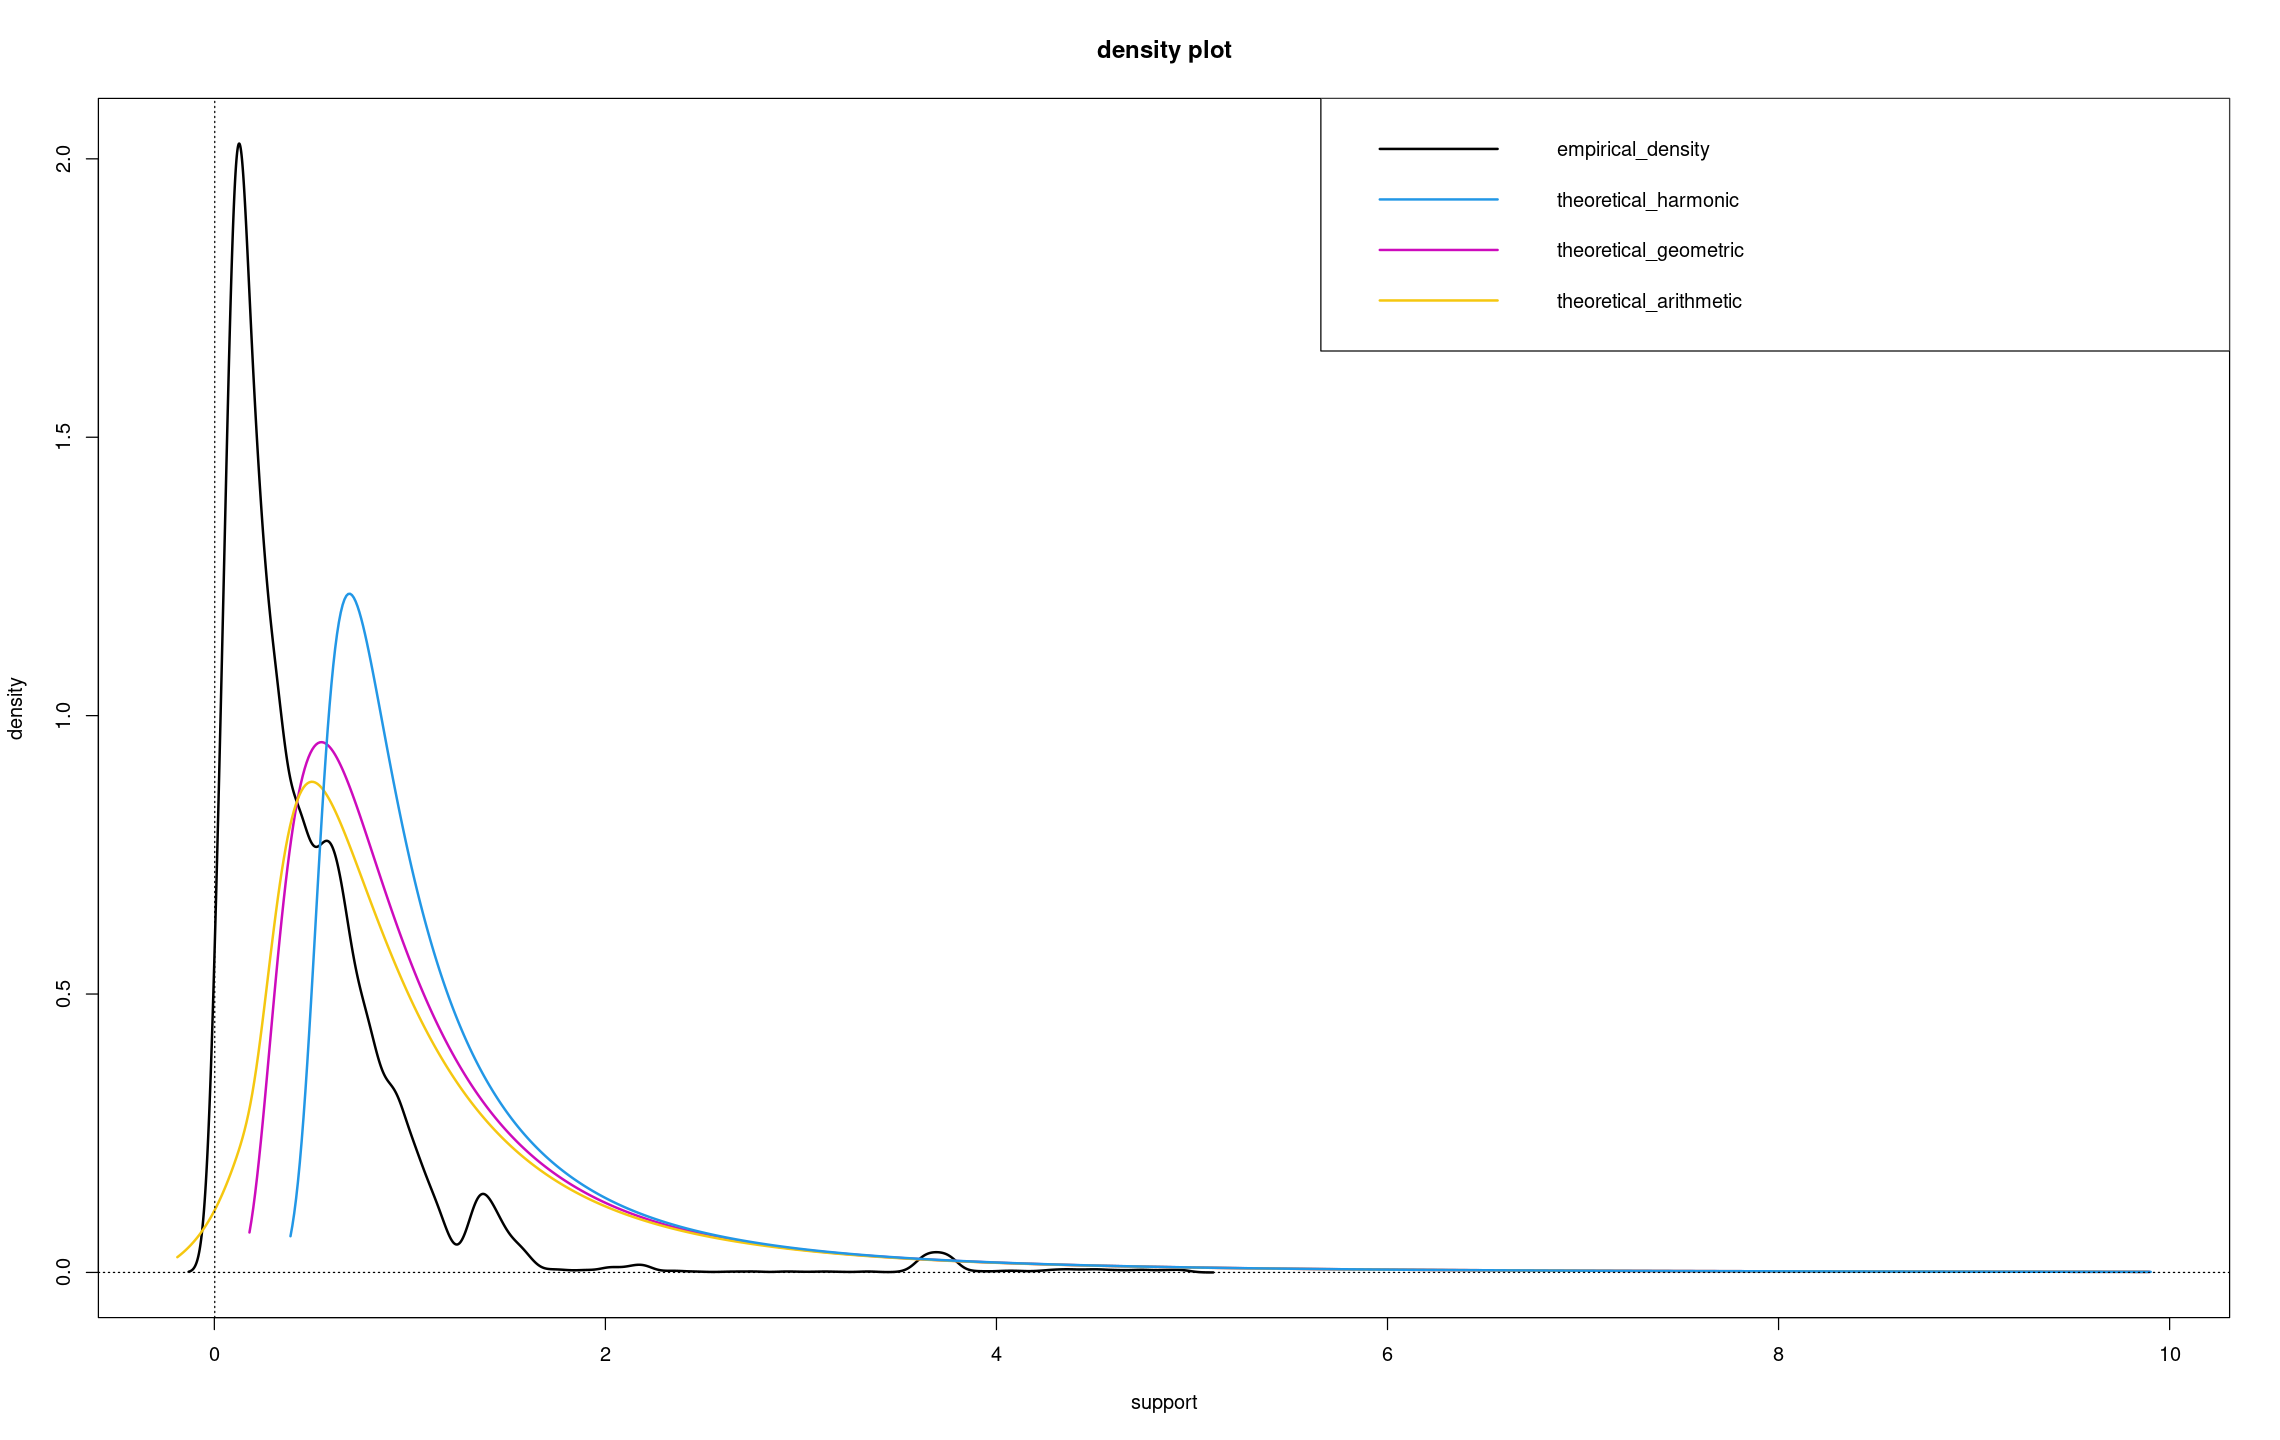

In [47]:
options(repr.plot.width=19, repr.plot.height=12)

plot_fit_non_stationary_gev_mixture_model(ns_gev_mixture_model_object,
                                          data_index = 0,
                                          model_index = 0,
                                          zoom_threshold = NULL,
                                          iterations = 10,
                                          xlab = "support",
                                          ylab = "density",
                                          main = "density plot",
                                          legend_position = "topright")

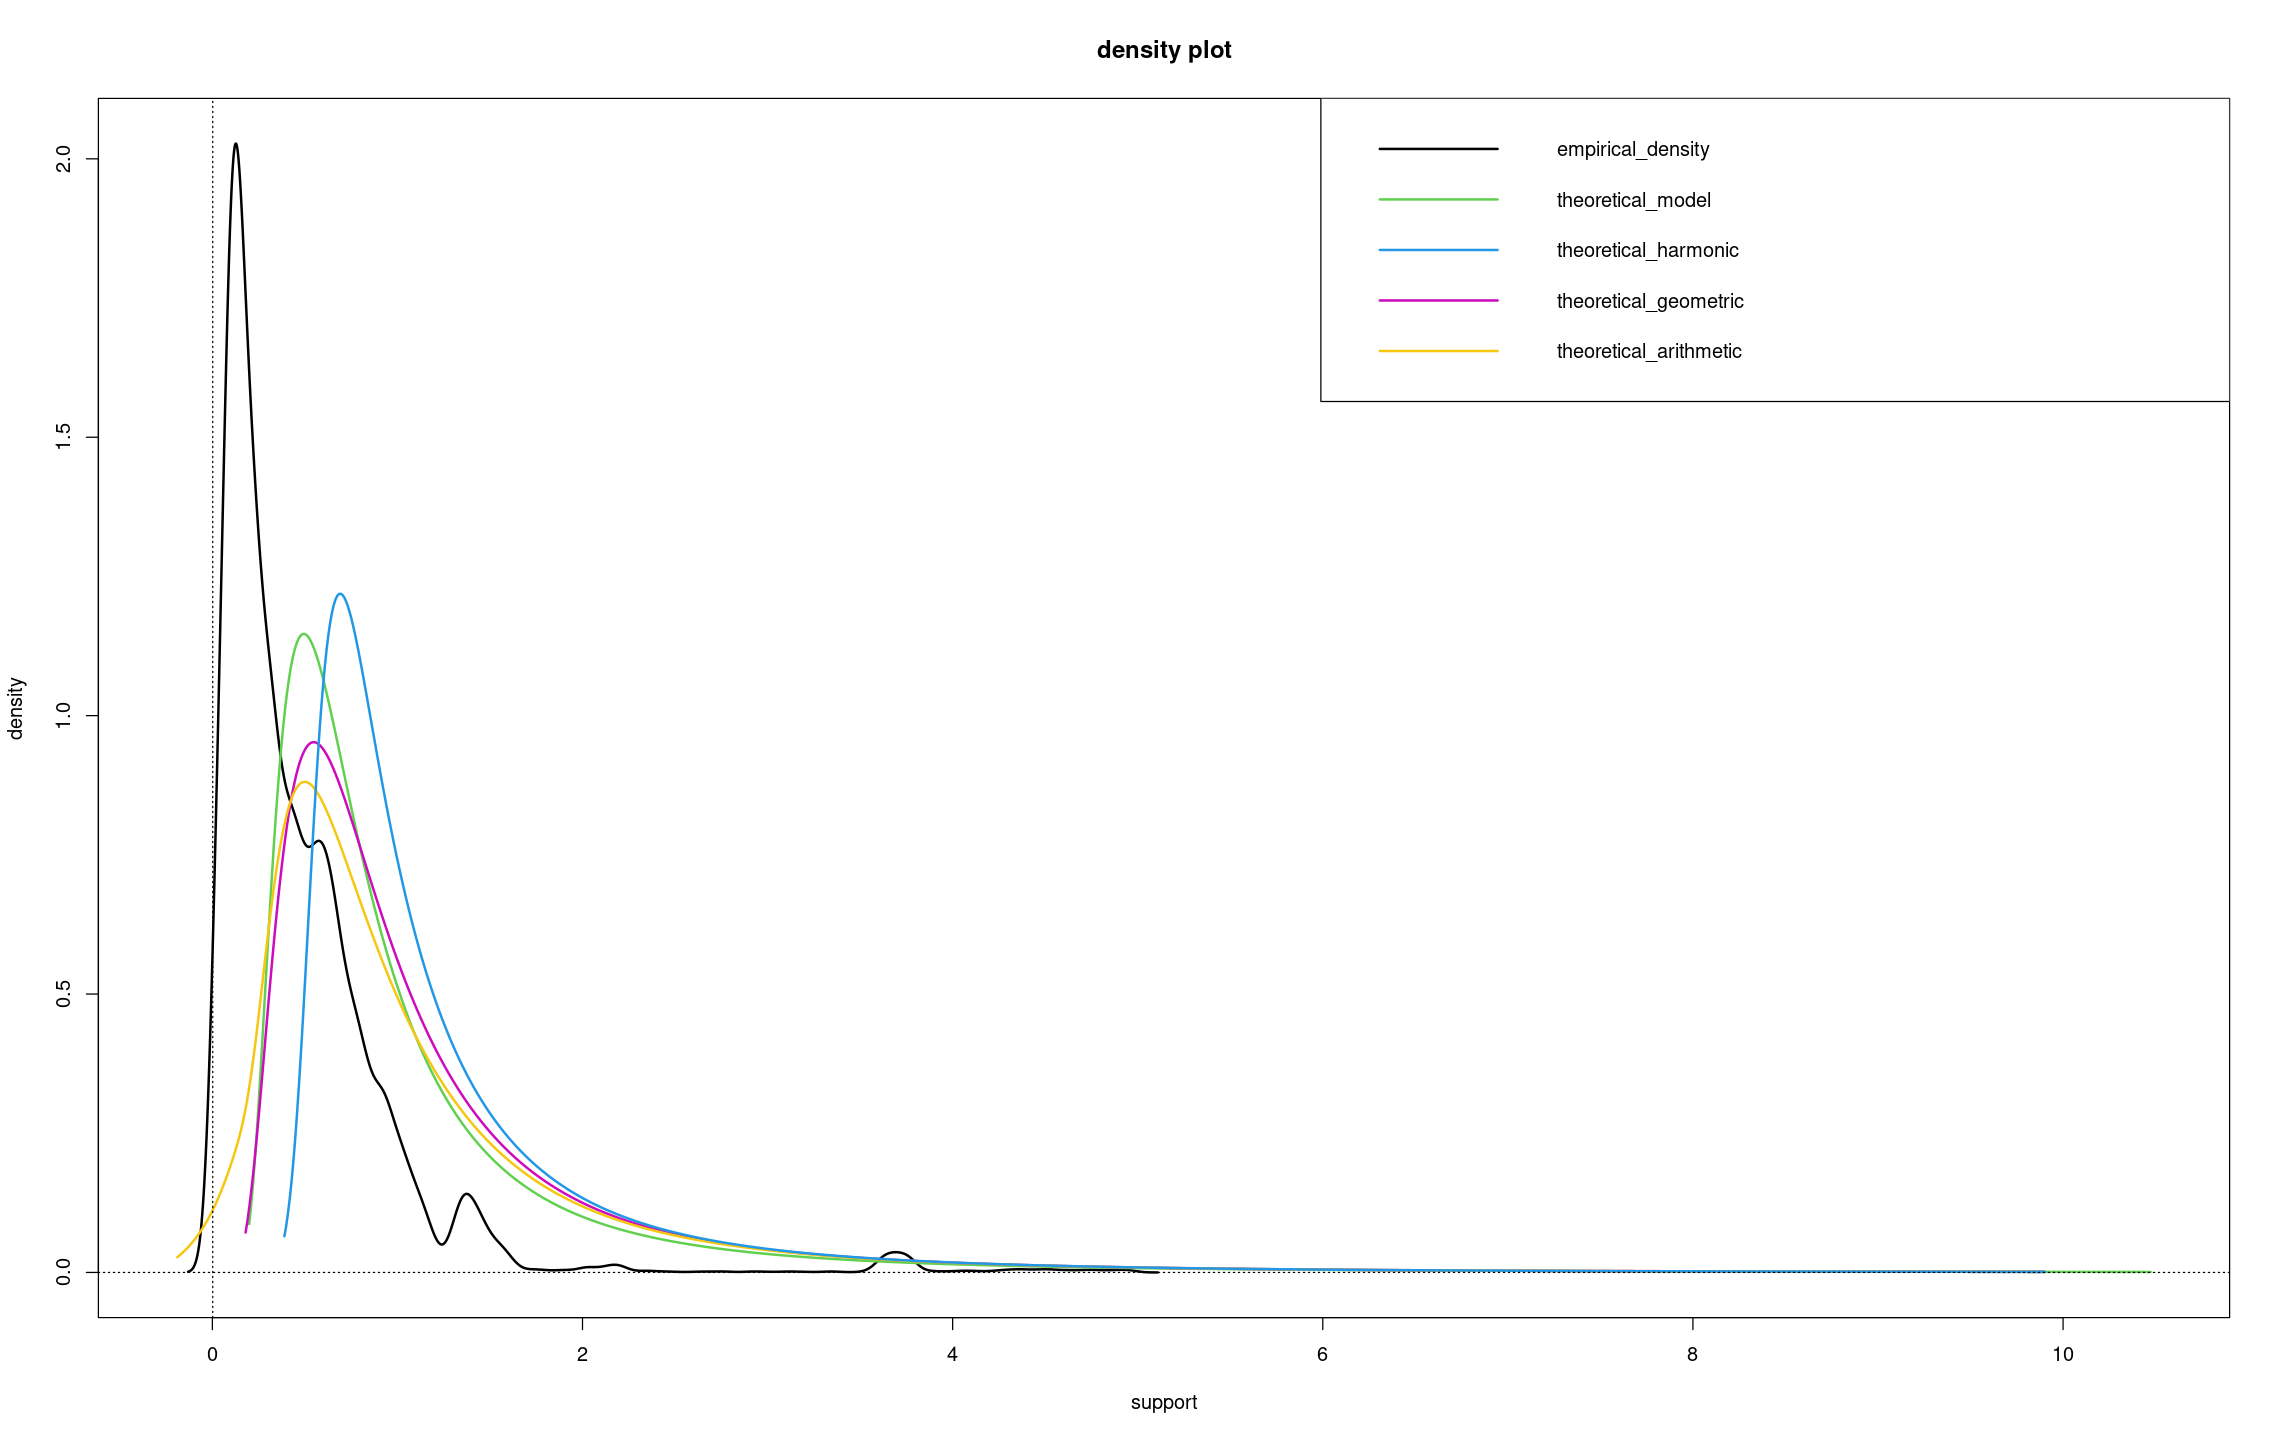

In [48]:
options(repr.plot.width=19, repr.plot.height=12)

plot_fit_non_stationary_gev_mixture_model(ns_gev_mixture_model_object,
                                          data_index = 0,
                                          model_index = which.max(ns_gev_mixture_model_object$weights),
                                          zoom_threshold = NULL,
                                          iterations = 10,
                                          xlab = "support",
                                          ylab = "density",
                                          main = "density plot",
                                          legend_position = "topright")

## Quantiles

In [49]:
partial_data <- ns_gev_mixture_model_object$partial_data

threshold <- quantile(partial_data, probs = 0.975)

positions <- partial_data > threshold

partial_data_covariates <- ns_gev_mixture_model_object$partial_data_covariates[positions, ]

partial_data_observations <- partial_data[positions]

In [50]:
tail(partial_data_covariates)

velocity      object       area         
19189  0.1306945943 0.6584671331 -0.1391569021
19190 -0.5252809580 0.7476001757 -0.2553886739
19191  1.0590517072 0.6584671331  0.1385118670
19192  0.7230338609 0.5693340906 -0.2757522397
19839  0.6858677656 0.2128019204  3.1928854675
19840  0.1606503458 0.4802010480  3.2910516479

In [51]:
range(partial_data_observations)

[1] 1.507918835 4.976793766

In [52]:
length(partial_data_observations)

[1] 572

### alpha = n^(-1)

In [53]:
alpha <- n^(-1)

print(alpha)

[1] 4.377133853e-05


In [54]:

quantiles_1 <- sapply(1:nrow(partial_data_covariates), function(index){
    new_data_covariates_scaled <- dplyr::slice(partial_data_covariates, index)

    results_geometric <- estimate_non_stationary_gev_mixture_model_quantile(ns_gev_mixture_model_object,
                                                                        alpha = alpha,
                                                                        data = new_data_covariates_scaled,
                                                                        do.ci = FALSE,
                                                                        confidence_level = 0.95,
                                                                        kind = c("geometric", "arithmetic", "harmonic")[1],
                                                                        iterations = 10)

    results_geometric$covariates_1$gev_mixture_model_quantile
})


In [55]:
tail(quantiles_1)

[1] 86.23795743 86.22948931 86.19414040 86.22800571 86.03364155 86.04083379

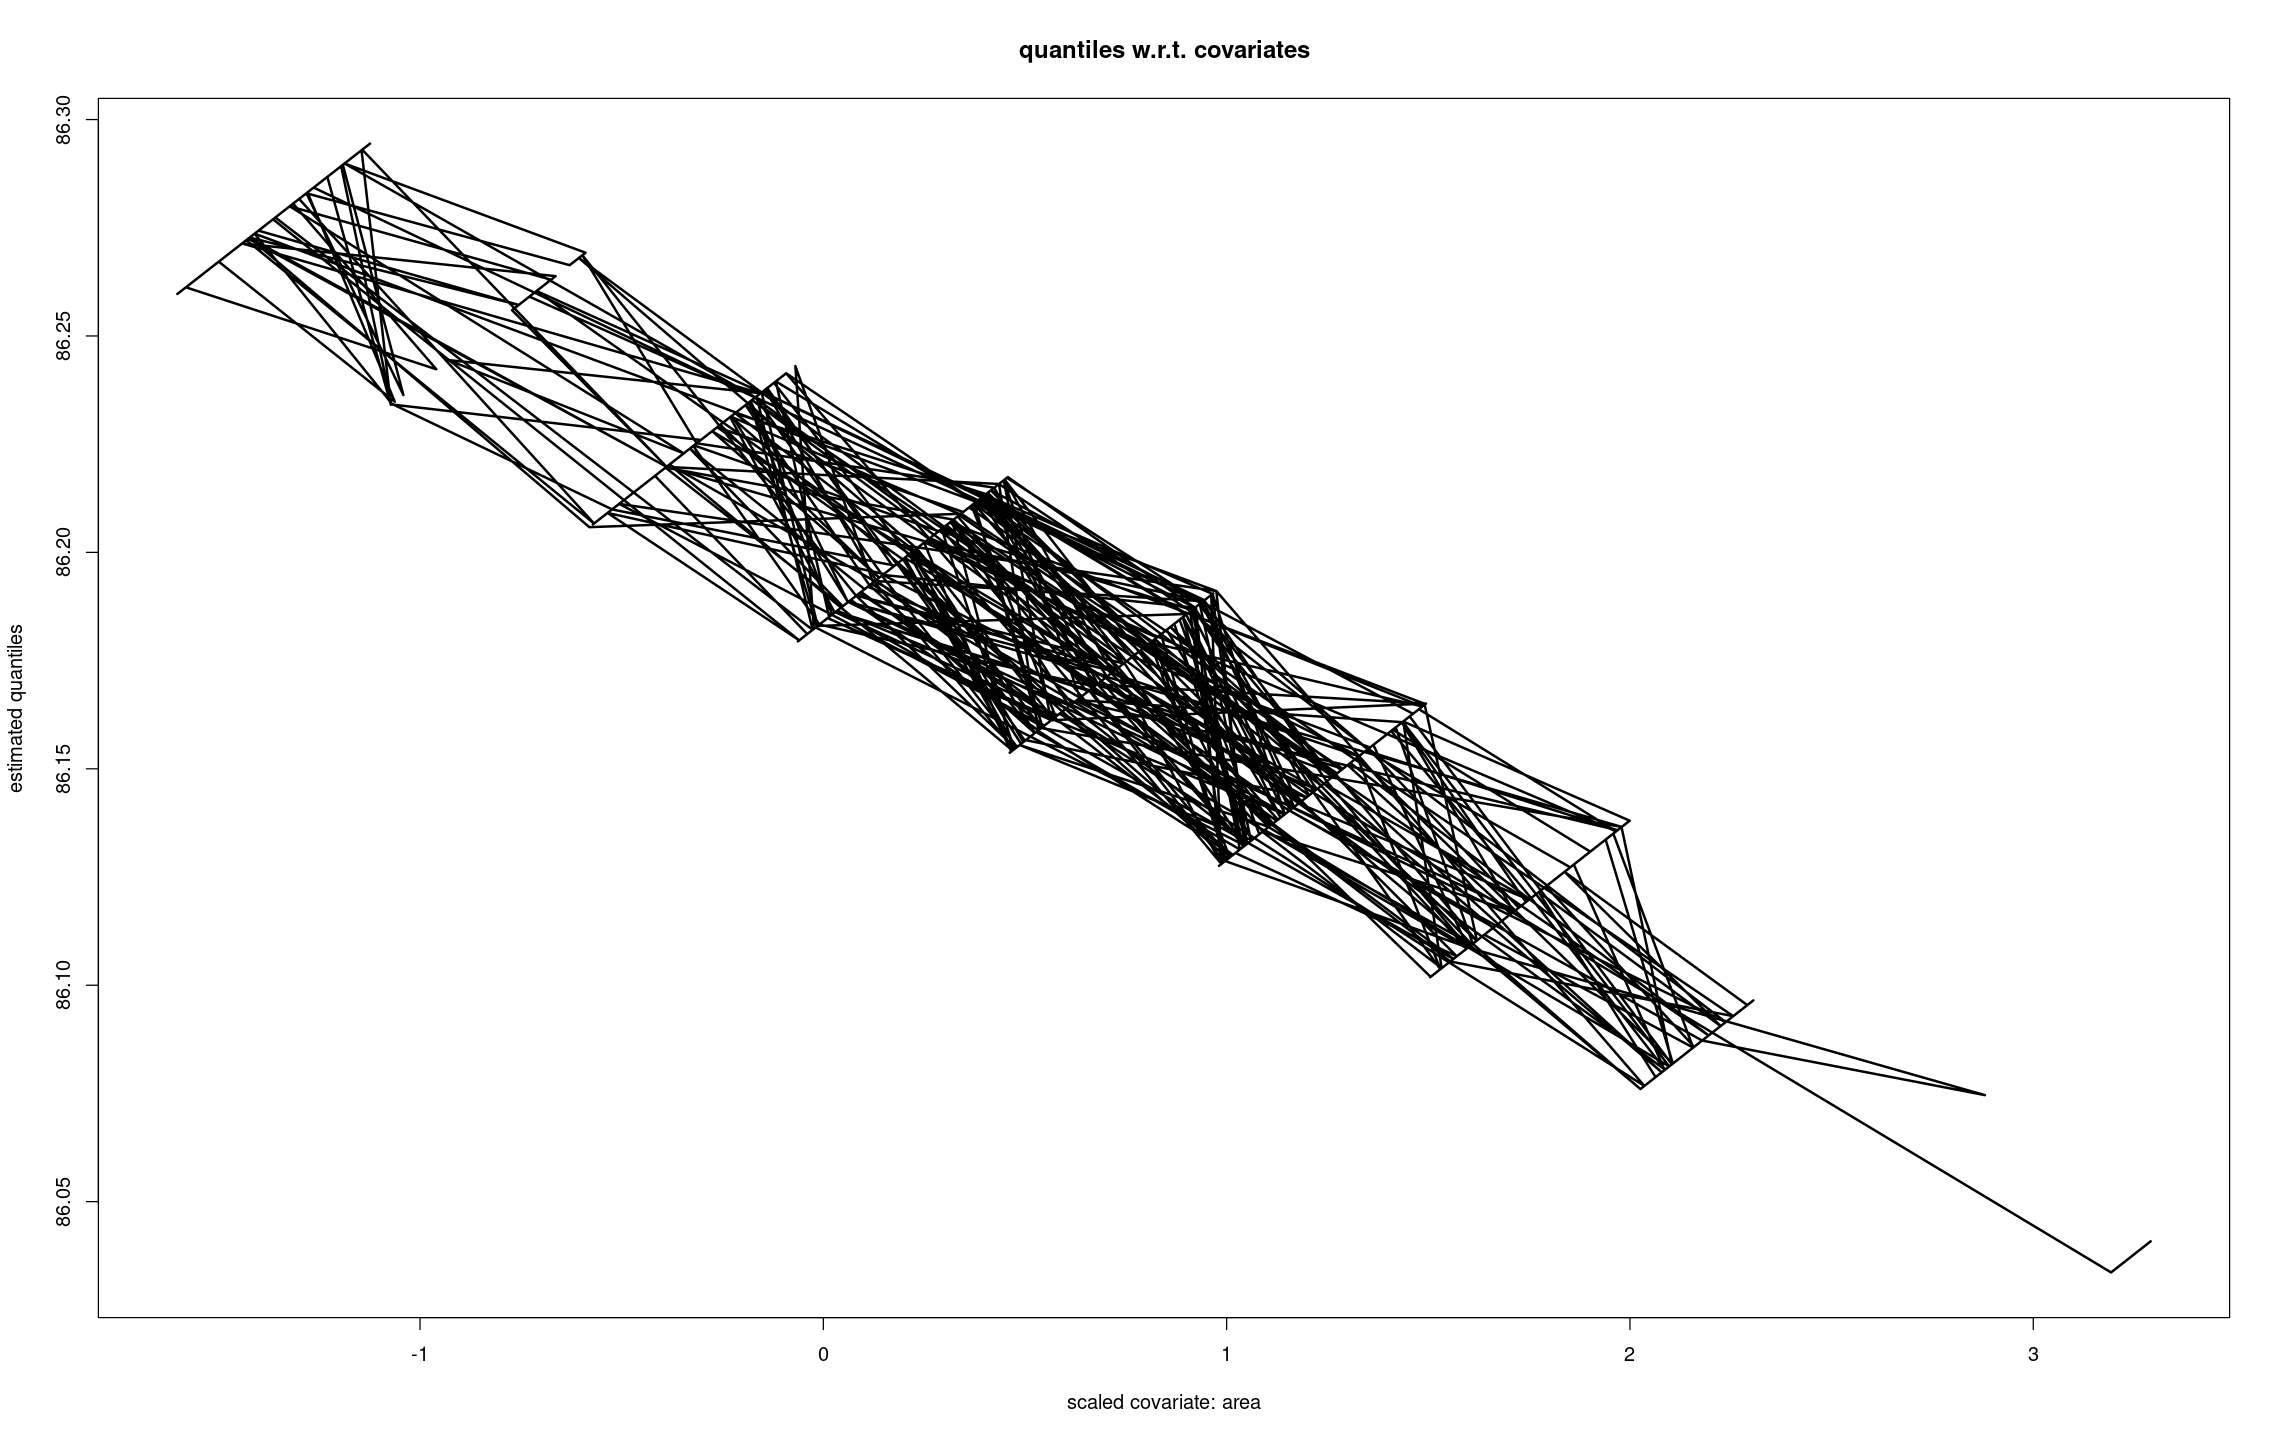

In [56]:
options(repr.plot.width=19, repr.plot.height=12)

plot(x = partial_data_covariates$area, 
     y = quantiles_1,
     type = "l",
     lwd = 2,
     main = "quantiles w.r.t. covariates",
     xlab = "scaled covariate: area",
     ylab = "estimated quantiles")

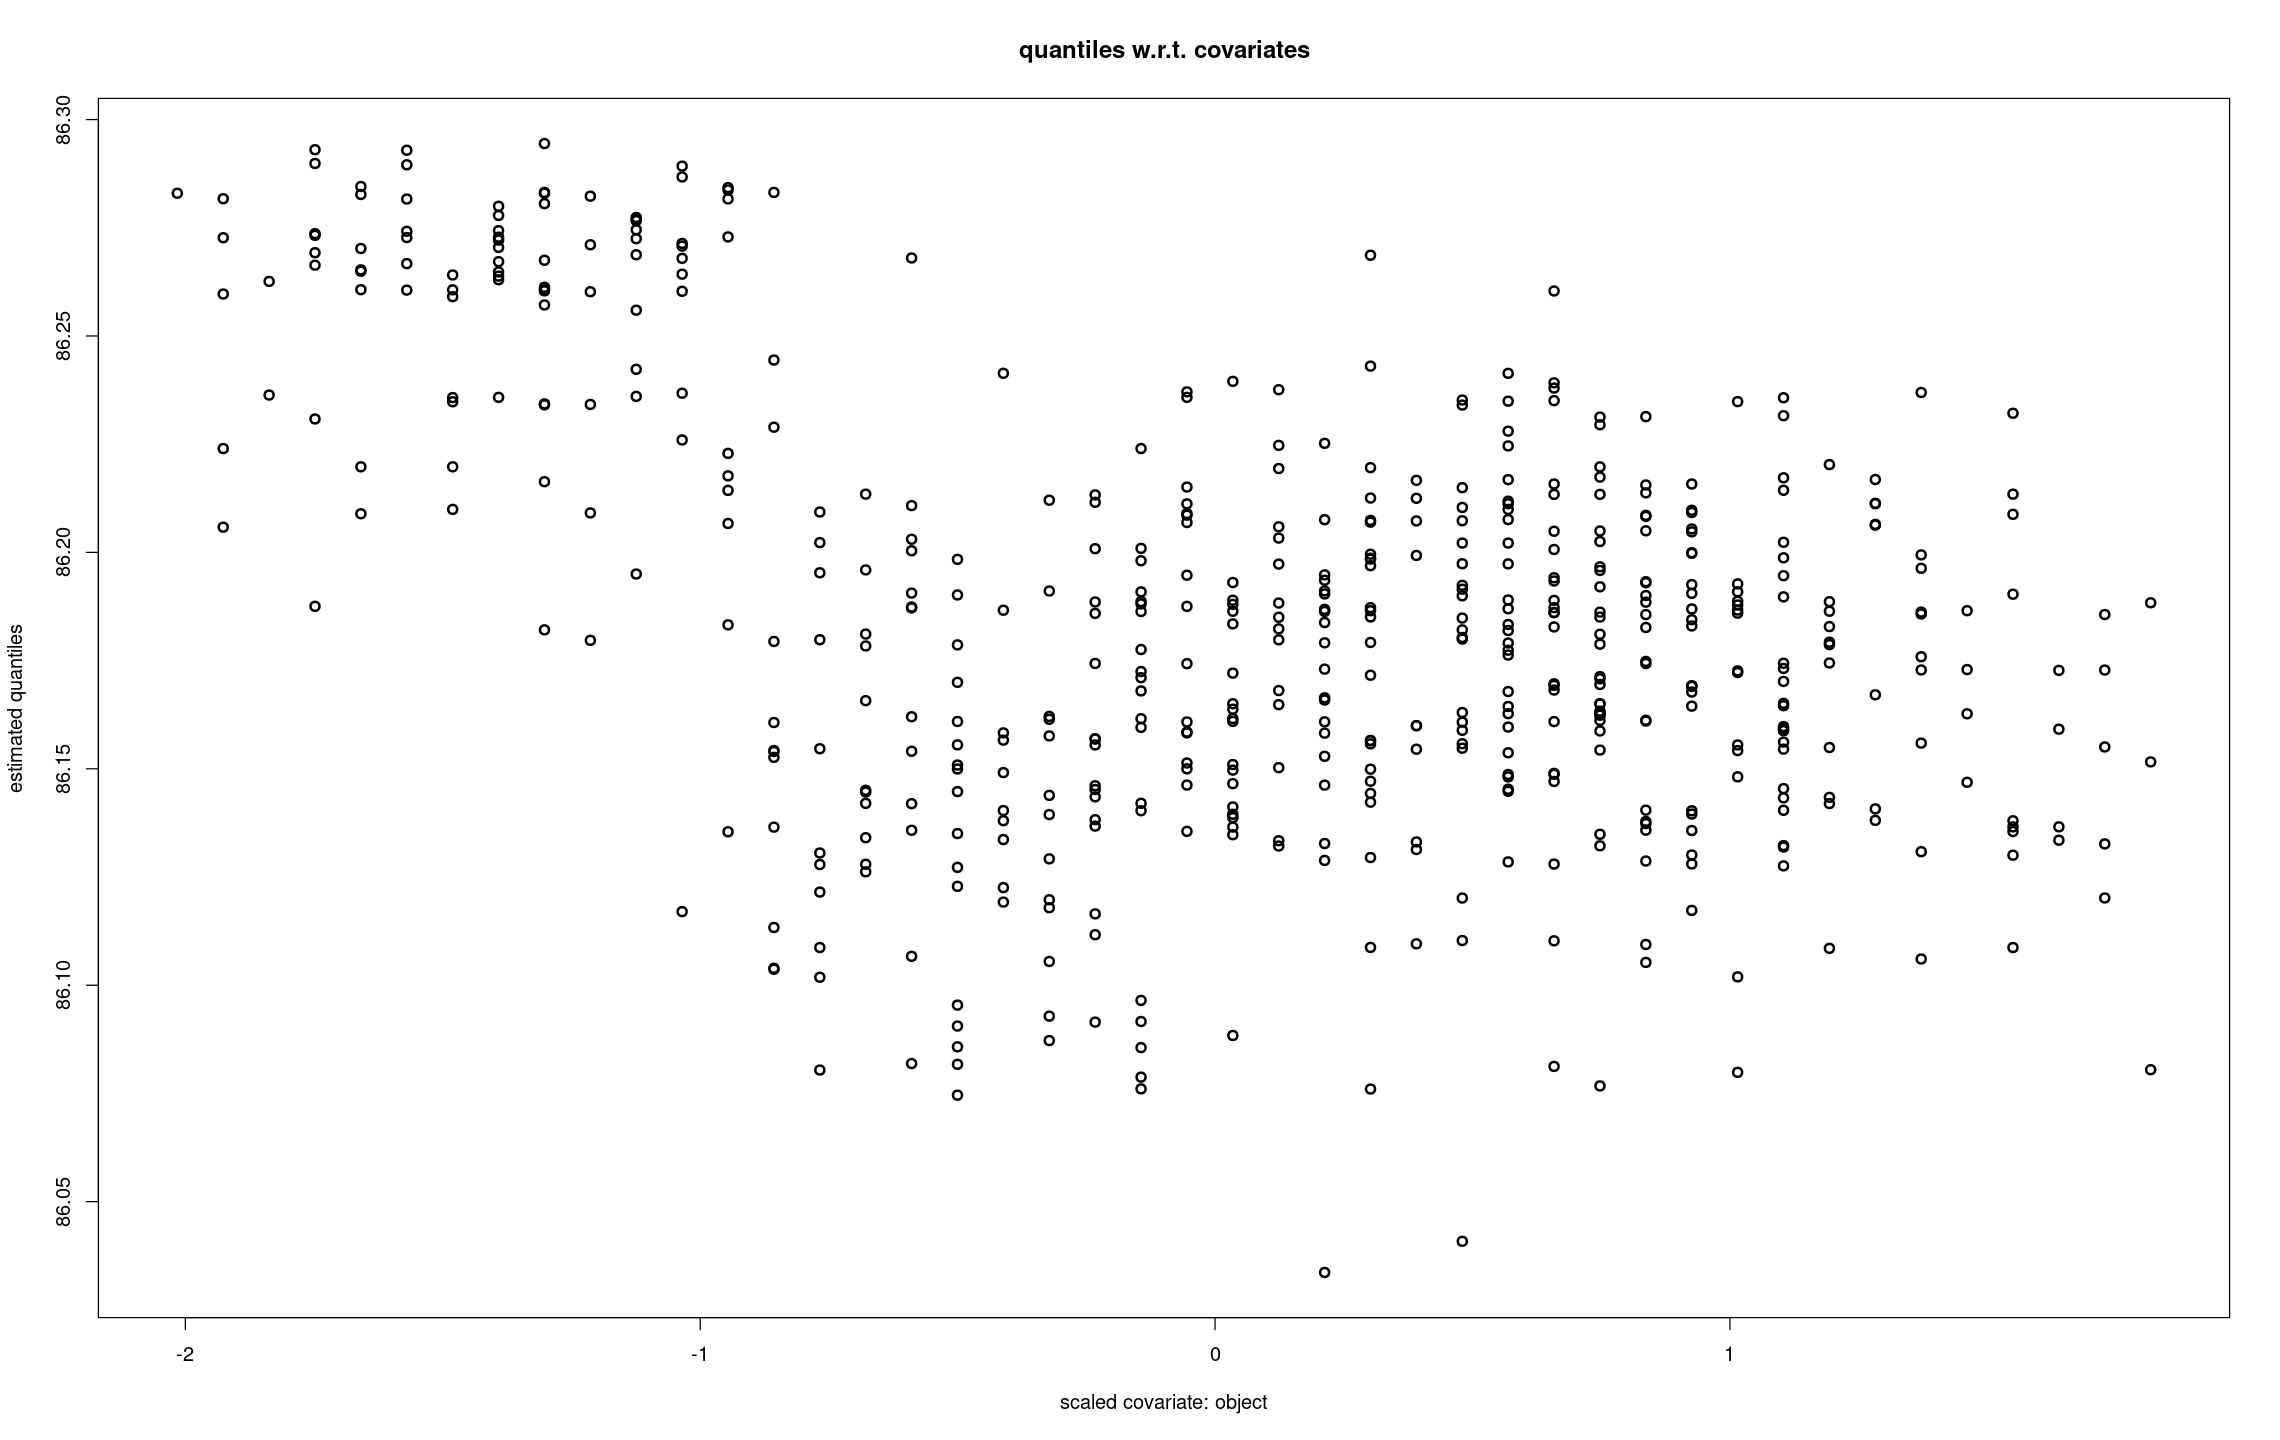

In [57]:
options(repr.plot.width=19, repr.plot.height=12)

plot(x = partial_data_covariates$object, 
     y = quantiles_1,
     type = "p",
     lwd = 2,
     main = "quantiles w.r.t. covariates",
     xlab = "scaled covariate: object",
     ylab = "estimated quantiles")

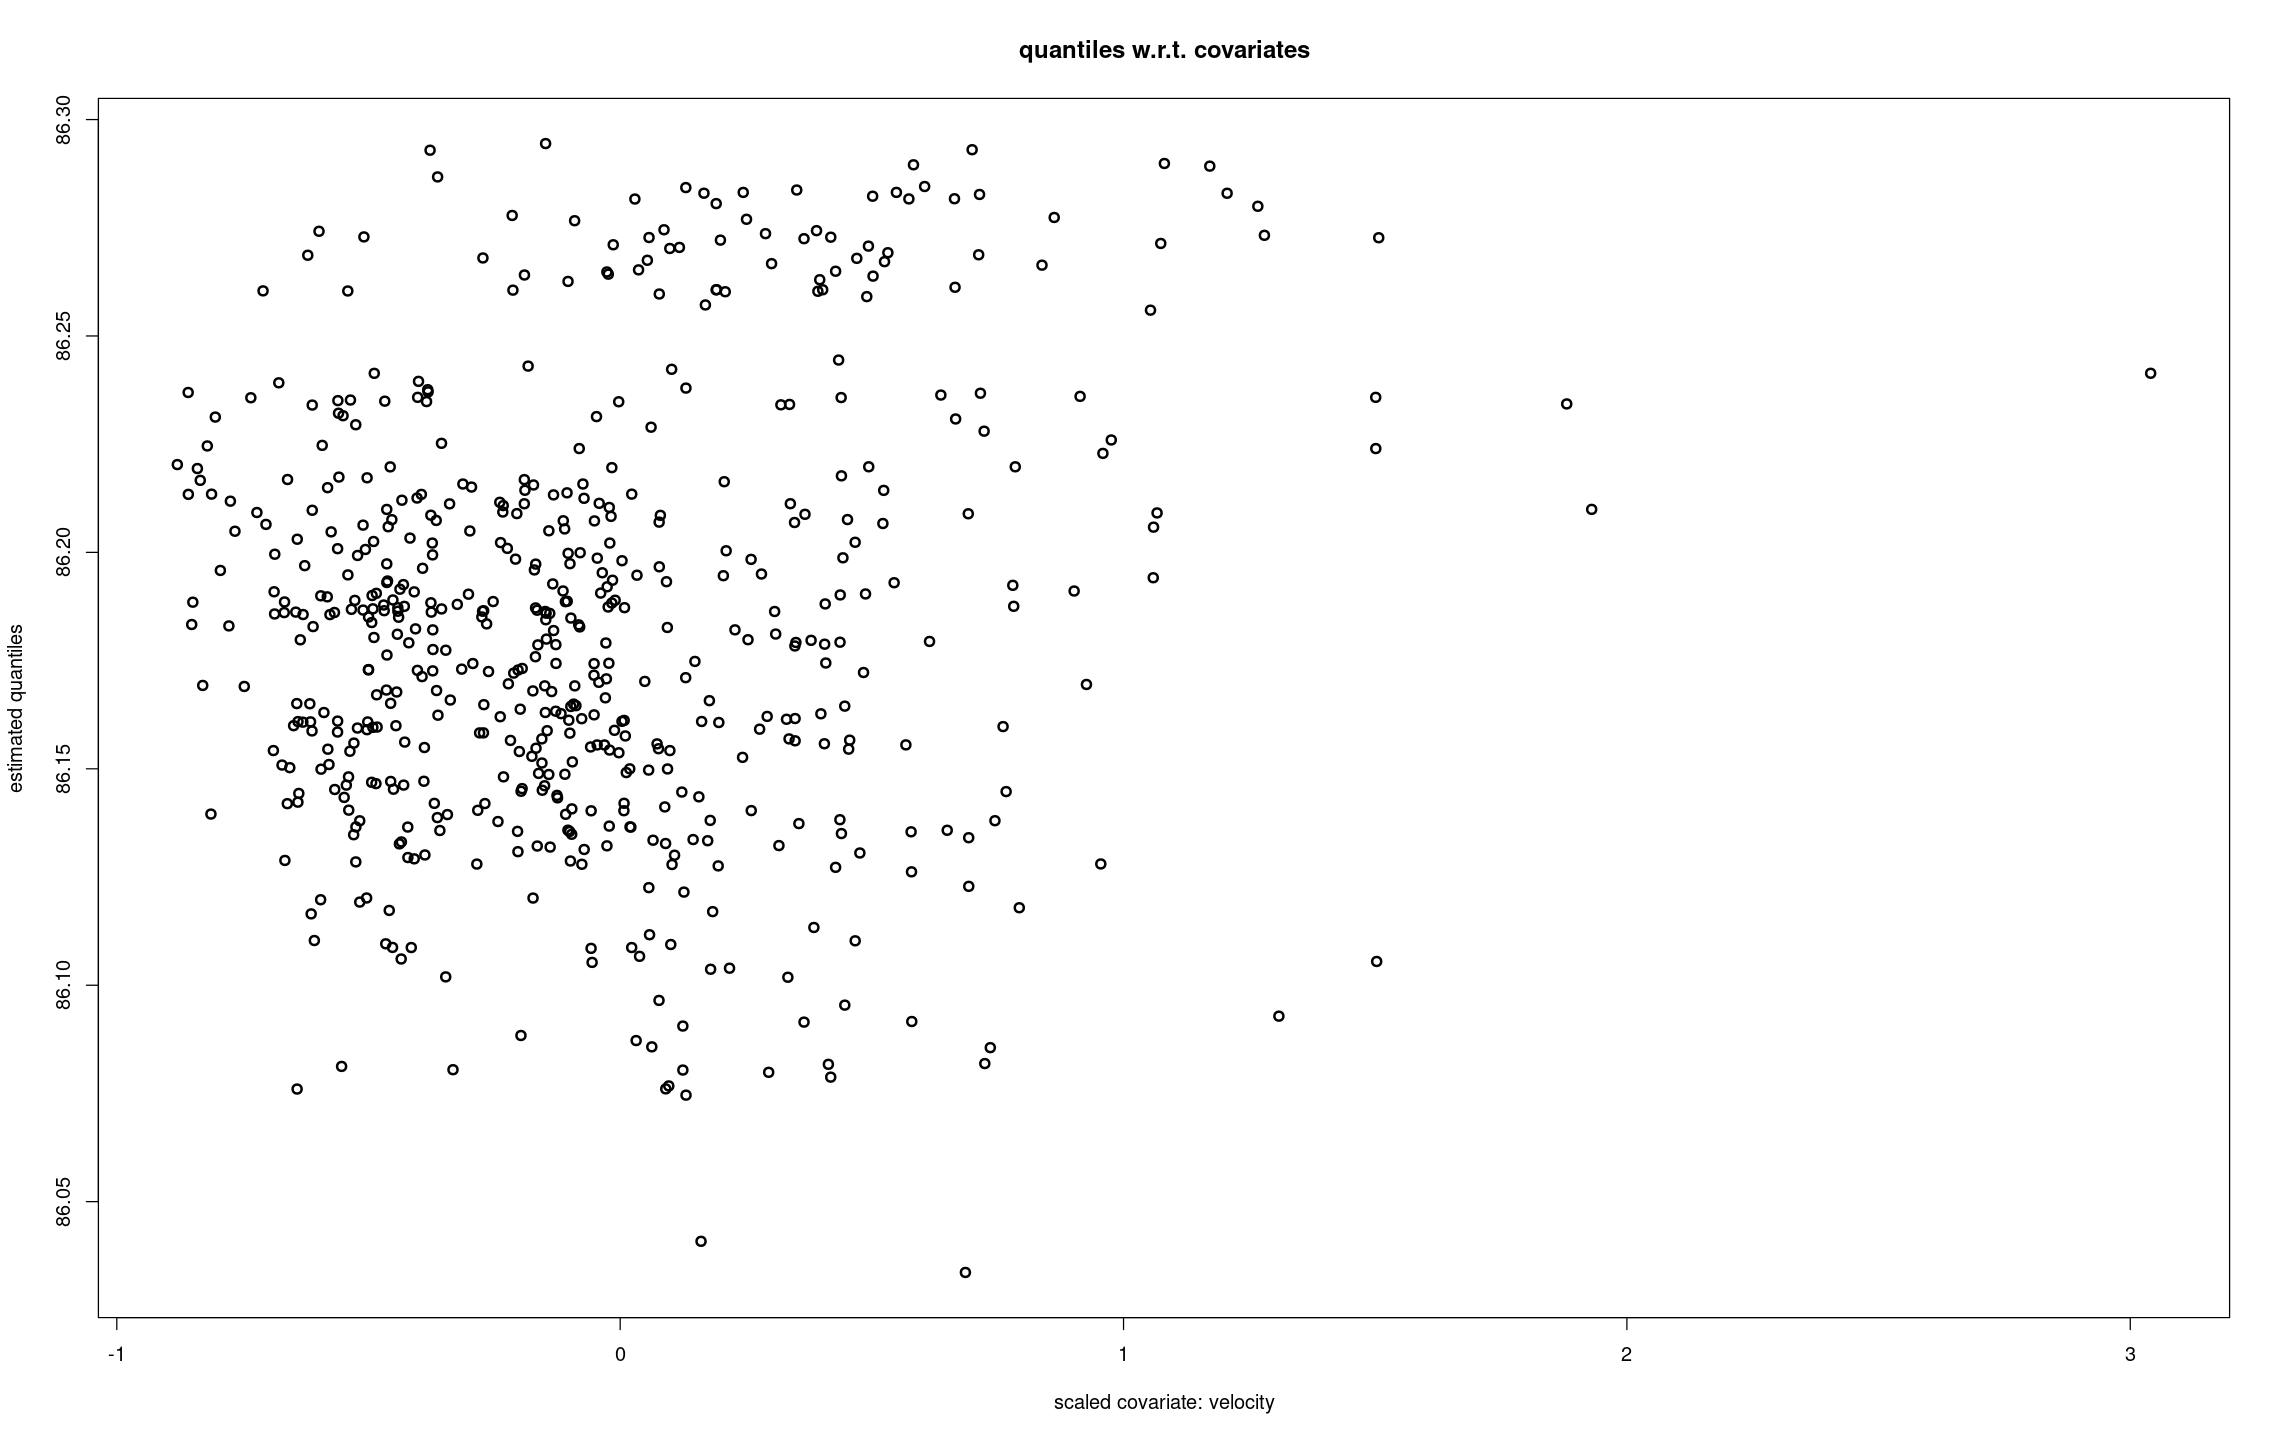

In [58]:
options(repr.plot.width=19, repr.plot.height=12)

plot(x = partial_data_covariates$velocity, 
     y = quantiles_1,
     type = "p",
     lwd = 2,
     main = "quantiles w.r.t. covariates",
     xlab = "scaled covariate: velocity",
     ylab = "estimated quantiles")

### alpha = n^(-2)

In [59]:
alpha <- n^(-2)

print(alpha)

[1] 1.915930076e-09


In [60]:

quantiles_2 <- sapply(1:nrow(partial_data_covariates), function(index){
    new_data_covariates_scaled <- dplyr::slice(partial_data_covariates, index)

    results_geometric <- estimate_non_stationary_gev_mixture_model_quantile(ns_gev_mixture_model_object,
                                                                        alpha = alpha,
                                                                        data = new_data_covariates_scaled,
                                                                        do.ci = FALSE,
                                                                        confidence_level = 0.95,
                                                                        kind = c("geometric", "arithmetic", "harmonic")[1],
                                                                        iterations = 10)

    results_geometric$covariates_1$gev_mixture_model_quantile
})


In [61]:
tail(quantiles_2)

[1] 10917.60368 10917.60476 10917.60110 10917.60495 10917.57272 10917.57181

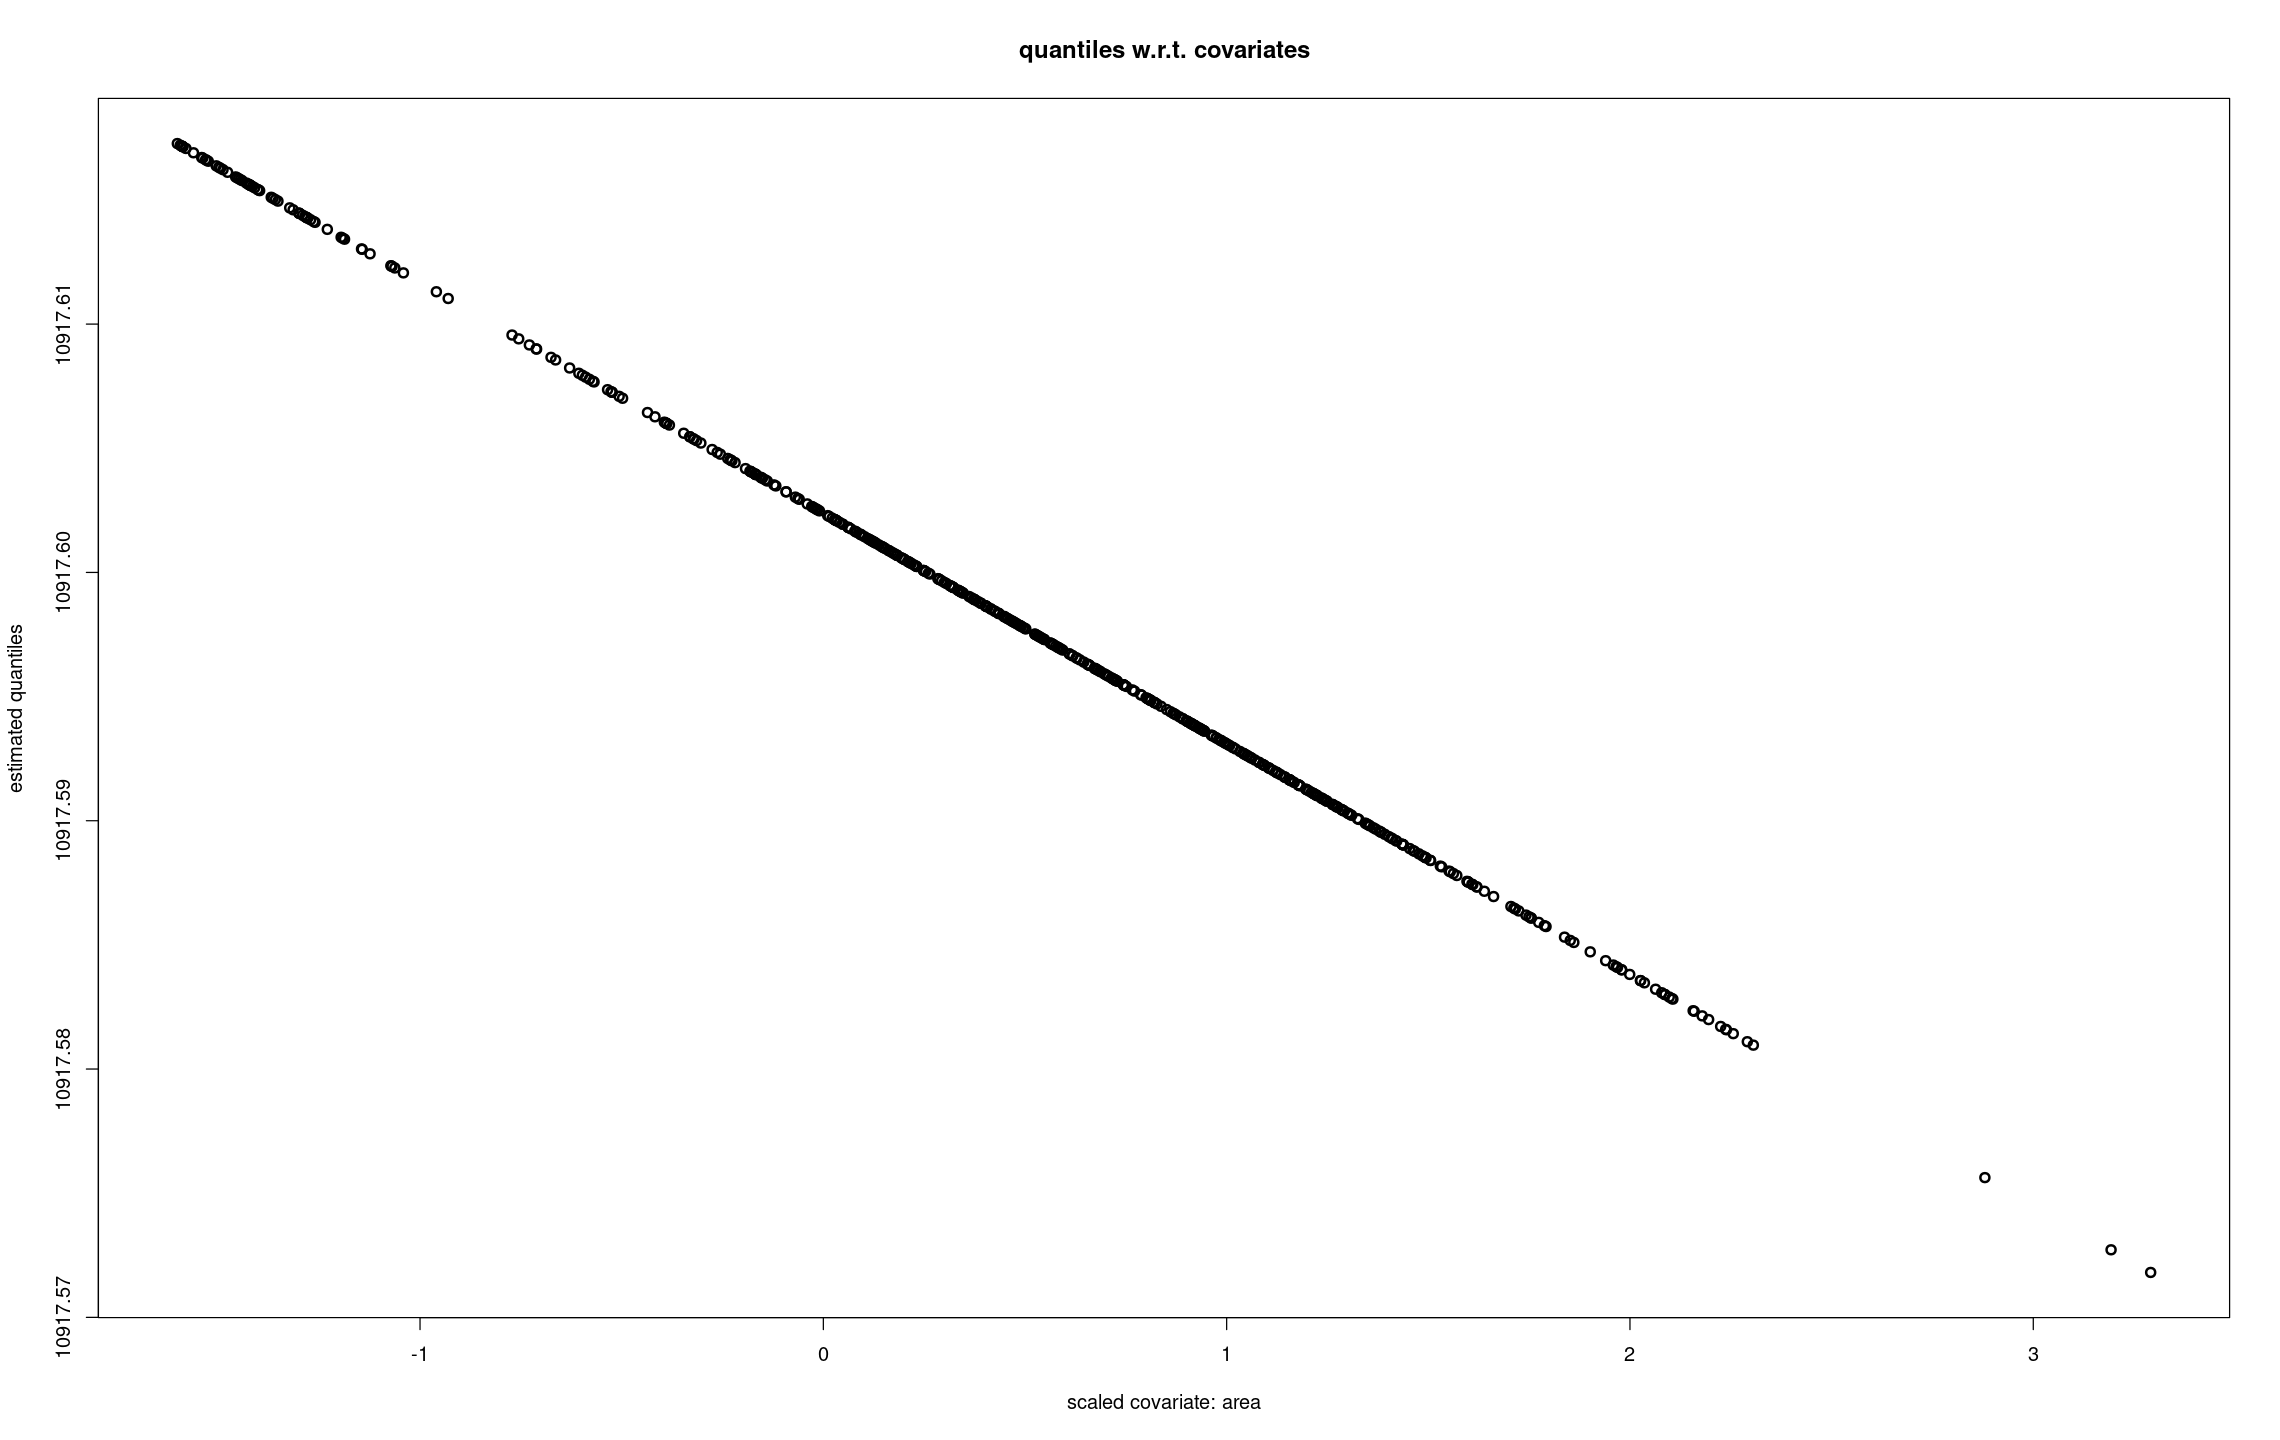

In [62]:
options(repr.plot.width=19, repr.plot.height=12)

plot(x = partial_data_covariates$area, 
     y = quantiles_2,
     type = "p",
     lwd = 2,
     main = "quantiles w.r.t. covariates",
     xlab = "scaled covariate: area",
     ylab = "estimated quantiles")

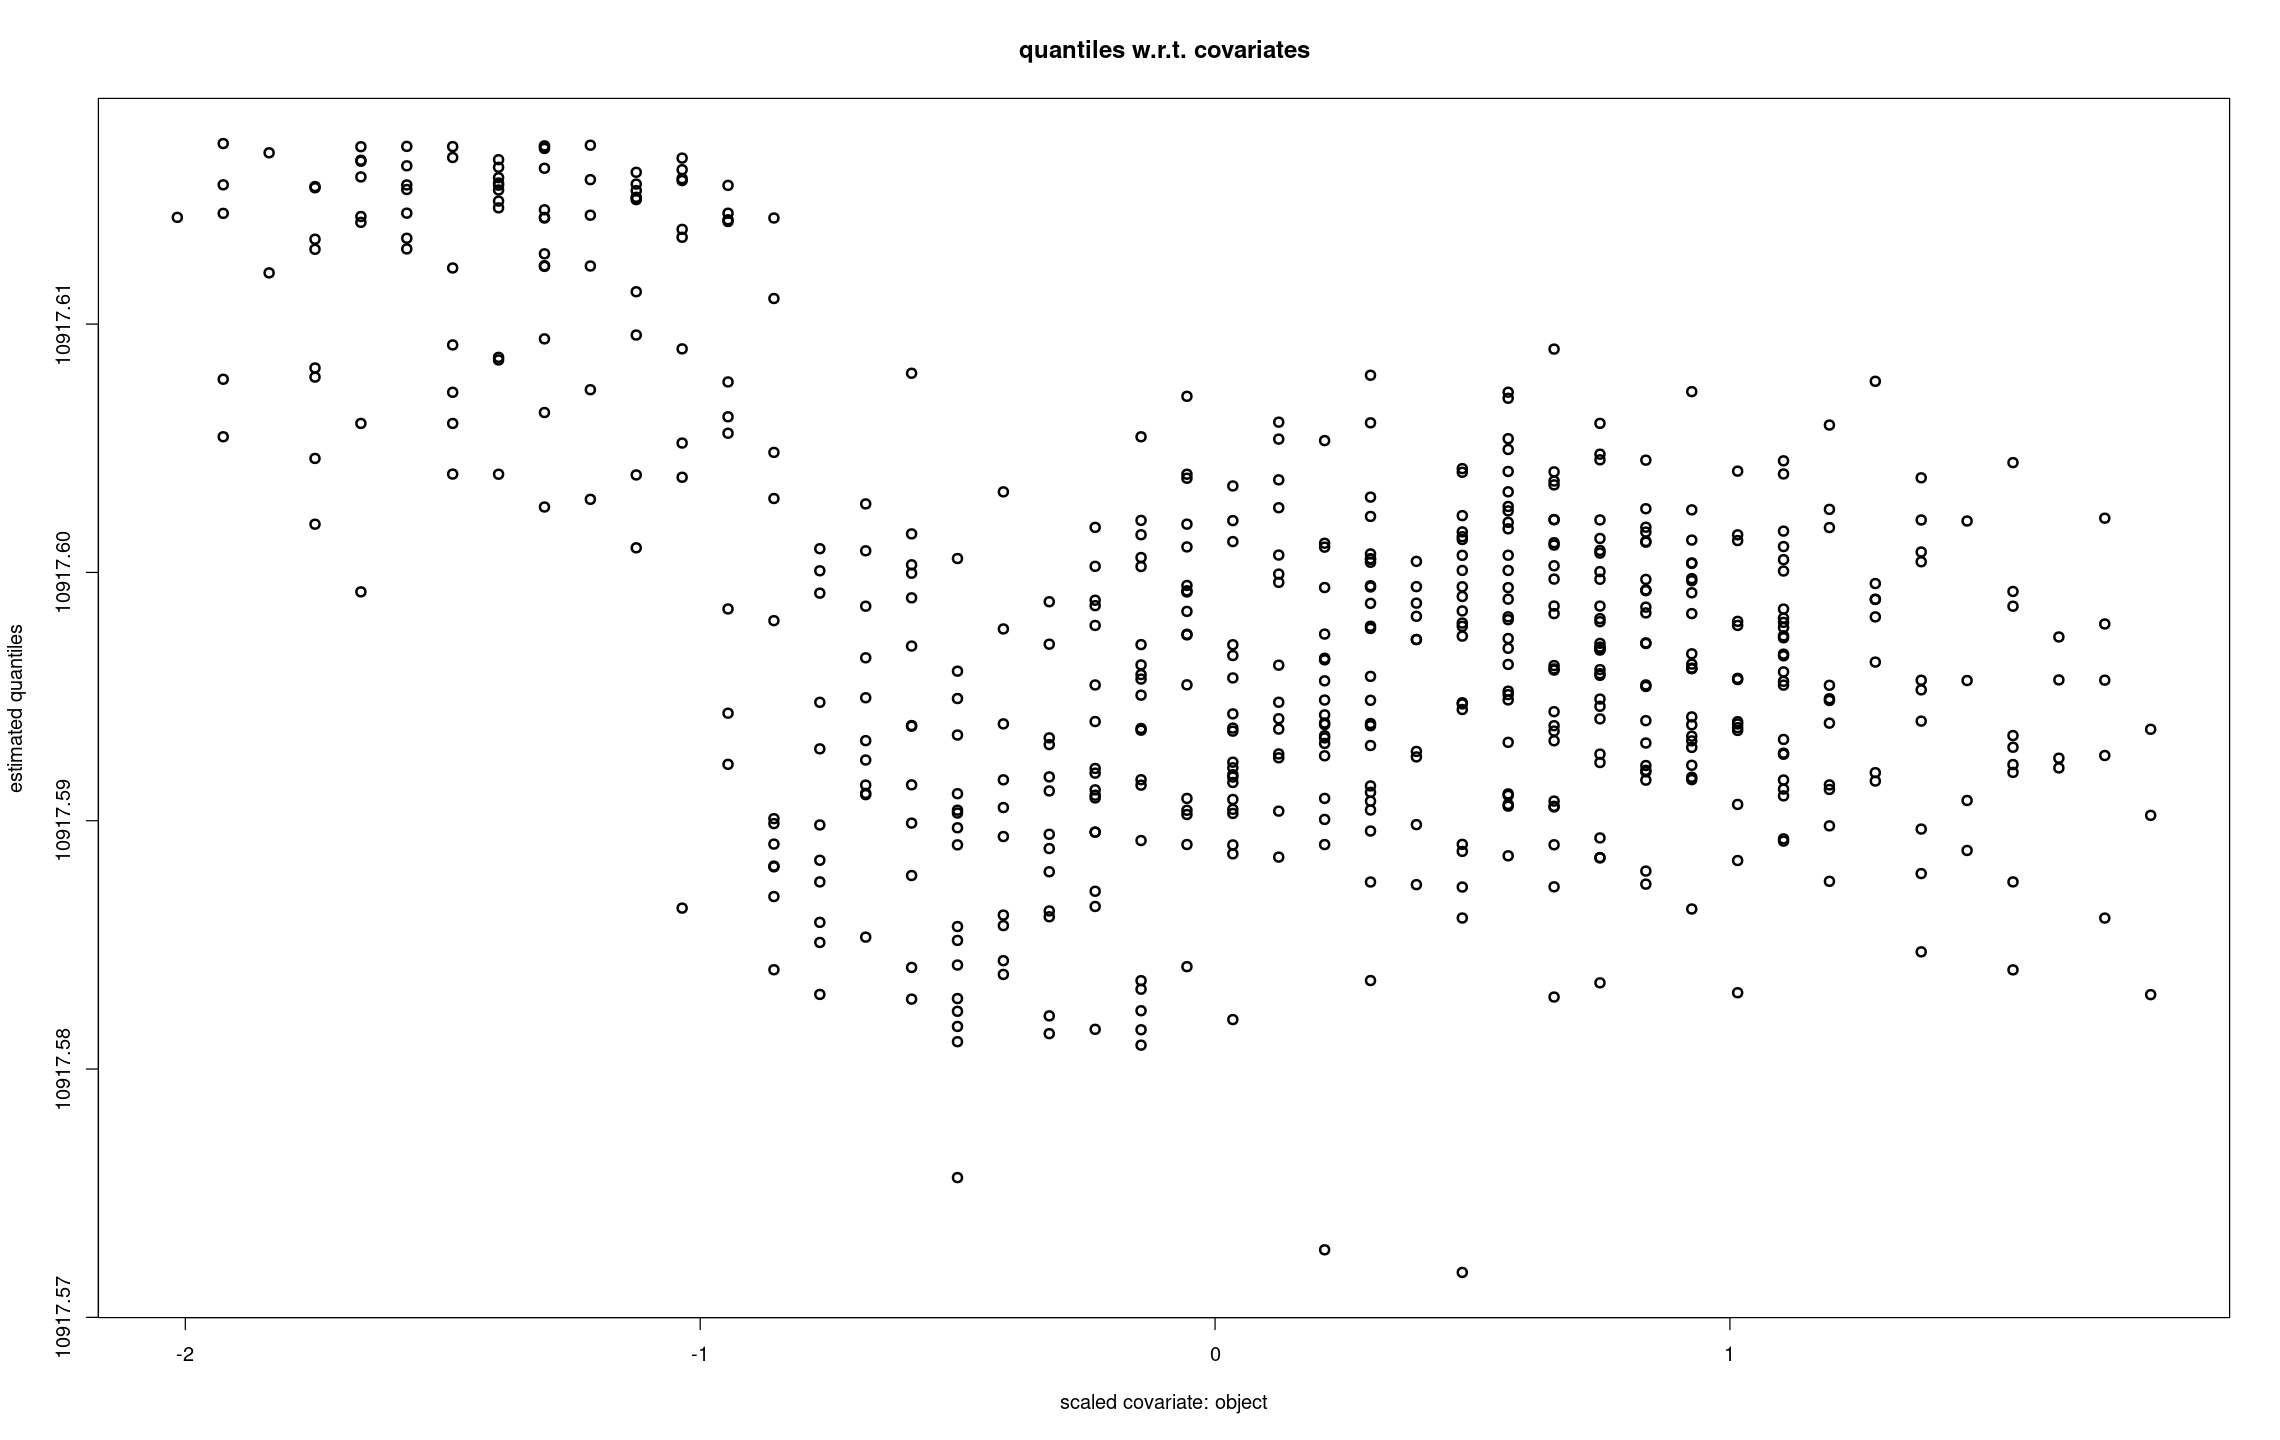

In [63]:
options(repr.plot.width=19, repr.plot.height=12)

plot(x = partial_data_covariates$object, 
     y = quantiles_2,
     type = "p",
     lwd = 2,
     main = "quantiles w.r.t. covariates",
     xlab = "scaled covariate: object",
     ylab = "estimated quantiles")

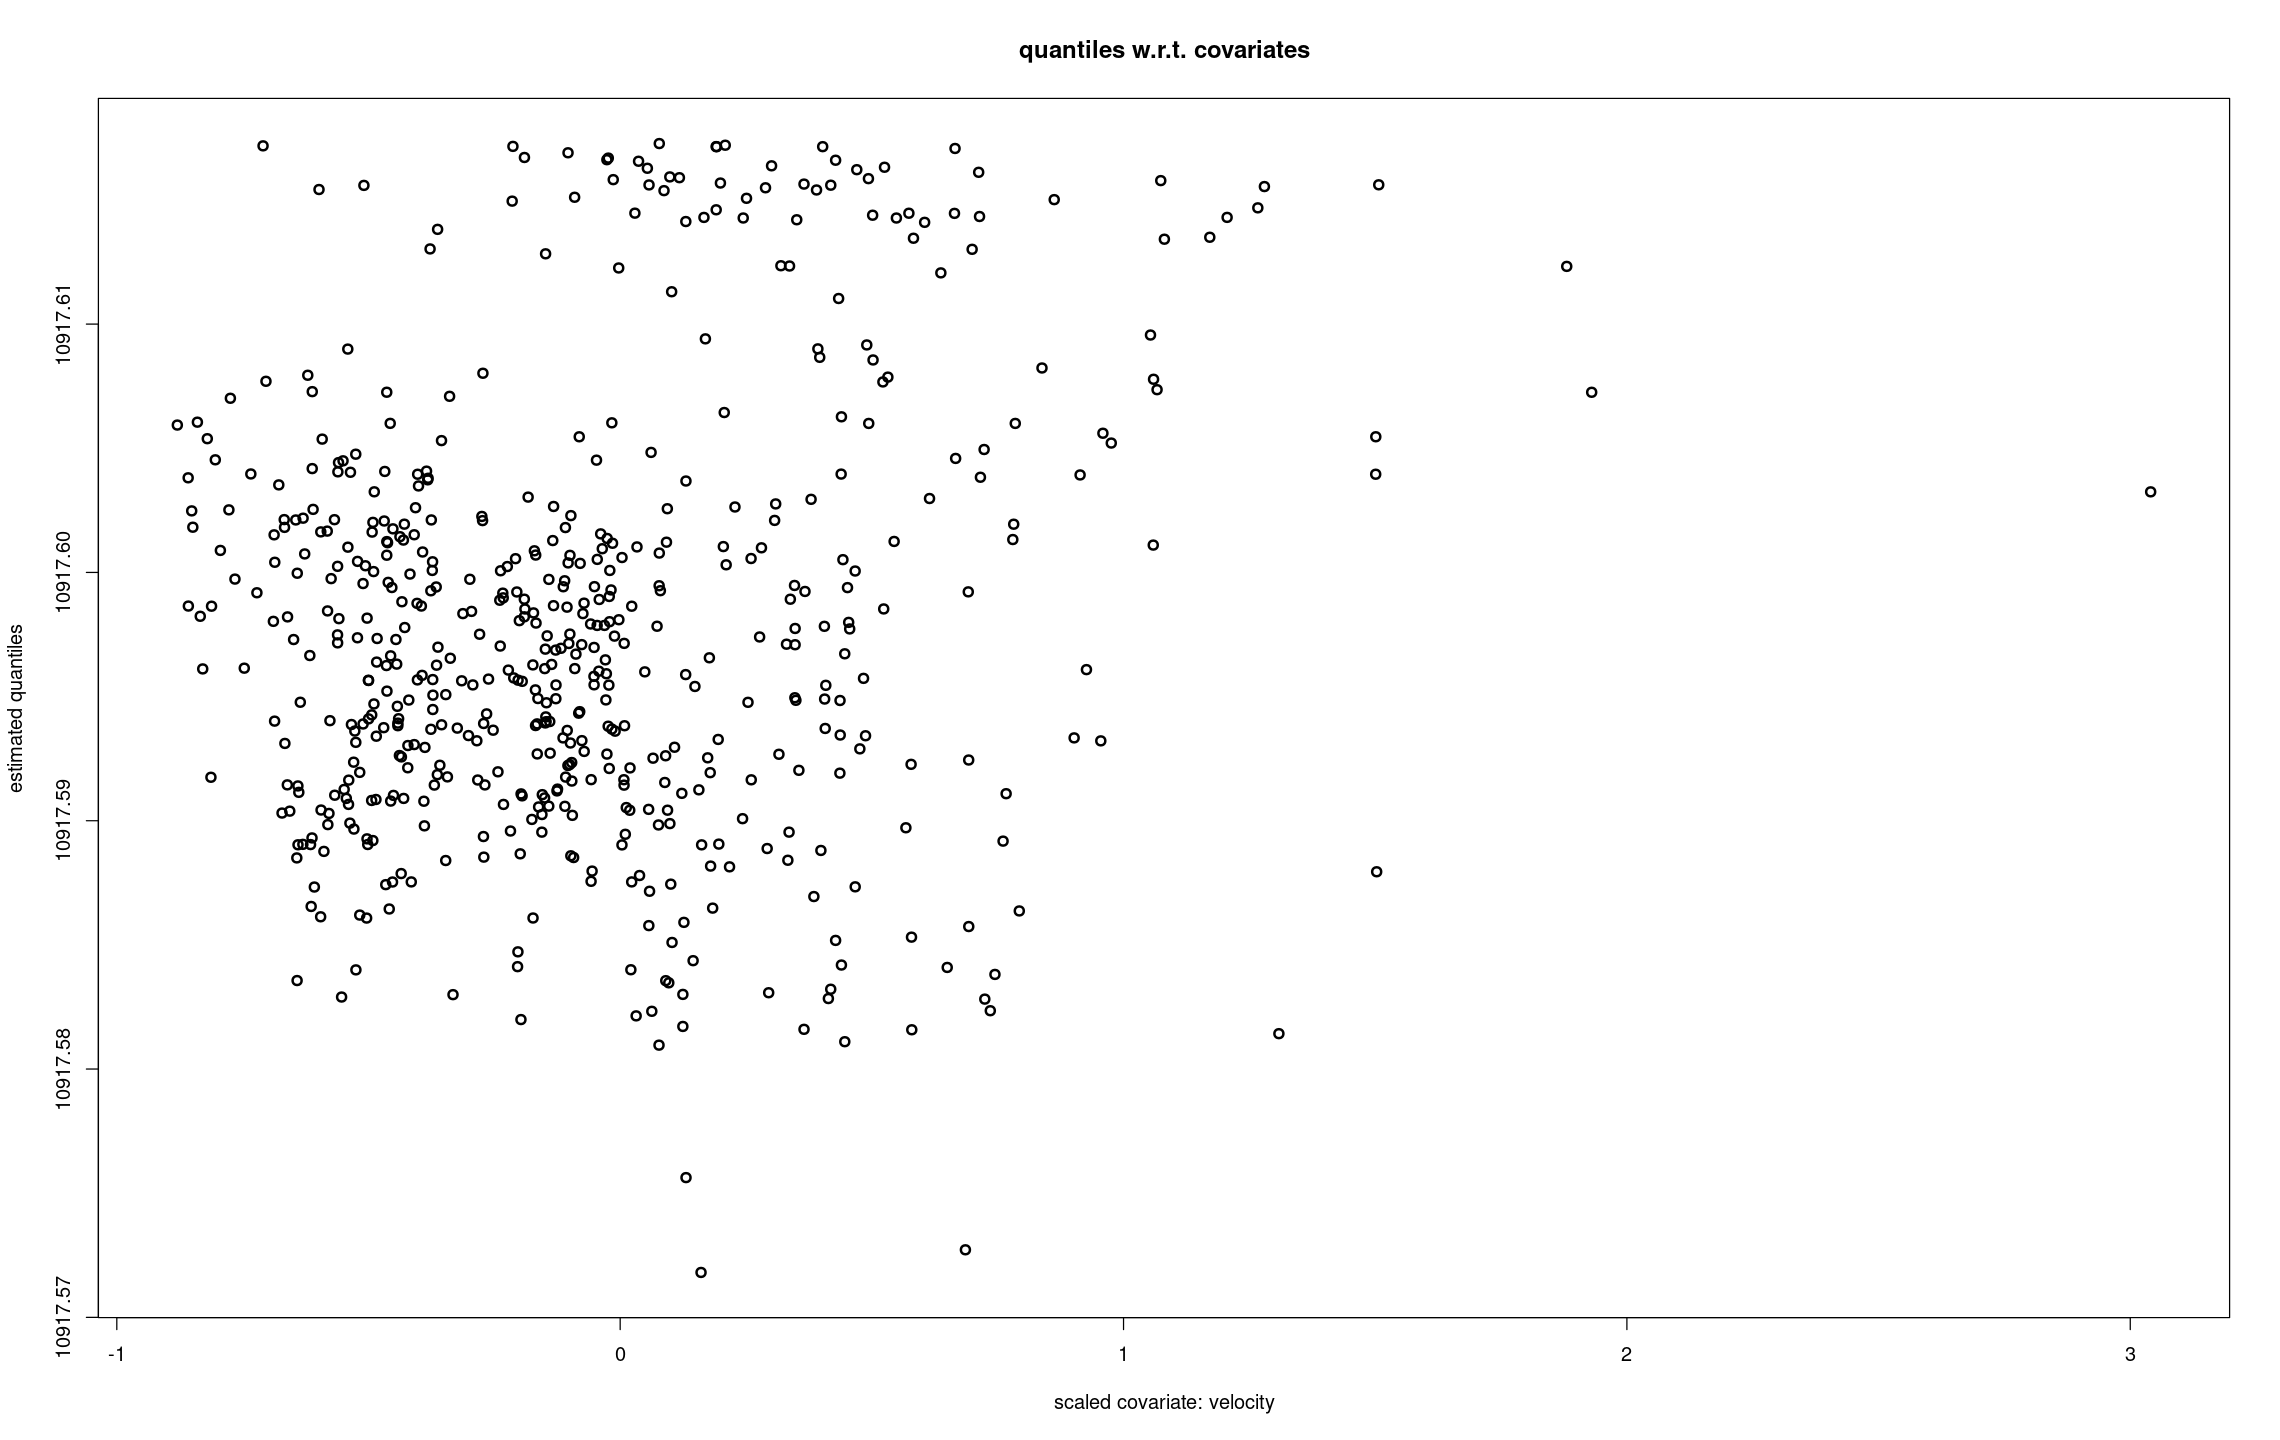

In [64]:
options(repr.plot.width=19, repr.plot.height=12)

plot(x = partial_data_covariates$velocity, 
     y = quantiles_2,
     type = "p",
     lwd = 2,
     main = "quantiles w.r.t. covariates",
     xlab = "scaled covariate: velocity",
     ylab = "estimated quantiles")

### alpha = 10^(-6)

In [65]:
alpha <- 10^(-6)

print(alpha)

[1] 1e-06


In [66]:
true_quantile <- NULL

print(true_quantile)

NULL


In [67]:
0.01*23000

[1] 230

In [68]:
new_data_covariates <- data.frame(velocity = 10^(-12),
                                  object = 0.8,
                                  area = 1)

new_data_covariates

velocity object area
1 1e-12    0.8    1

In [69]:
new_data_covariates_scaled <- get_standard_scaled_data(data_covariates_clean, newdata = new_data_covariates)

new_data_covariates_scaled

velocity     object       area        
1 -1.613184706 -2.924681177 0.2472032662

In [70]:
index <- which.max(x)

new_data_covariates <- dplyr::slice(data_covariates_clean, index)

new_data_covariates

velocity        object area        
1 8.658947144e-11 21     0.4669624901

In [71]:
index <- which.max(x)

new_data_covariates_scaled <- dplyr::slice(data_covariates_clean_scaled, index)

# new_data_covariates_scaled <- dplyr::slice(ns_gev_mixture_model_object$all_data_covariates, index)

new_data_covariates_scaled

velocity     object       area        
1 0.2509946758 -1.124193718 -1.364458149

In [72]:
several_ns_gev_models <- ns_gev_mixture_model_object$selected_full_ns_gev_models

predicted_parameters <- get_several_ns_gev_model_normalized_parameters(several_ns_gev_models = several_ns_gev_models,
                                                                       data = new_data_covariates_scaled,
                                                                       use_extremal_index = TRUE,
                                                                       normalize_parameters = TRUE)

do.call(rbind, predicted_parameters)

location     scale        shape       
3   1.4697329297 0.7665632987 0.4527935893
5   1.2544336901 0.6687760514 0.4541645687
6   1.3156643798 0.6970682342 0.4550978265
7   1.2269188500 0.6571580350 0.4561166291
9   1.1383324214 0.6187343893 0.4576621636
20  0.9387067333 0.5273097322 0.4566670825
24  0.8614444690 0.4879815174 0.4476708851
26  0.8259603174 0.4695955154 0.4442935762
31  0.7731819459 0.4503178938 0.4469800423
39  0.7054726387 0.4120027650 0.4278666445
40  0.9186508380 0.5144084841 0.4461540994
57  0.7598880285 0.4428907302 0.4294558743
78  0.7958977198 0.4536469449 0.4135832350
90  0.8868907454 0.4821901682 0.3991250160
93  1.0158891022 0.5427913395 0.4004300829
101 0.8859744357 0.4879511029 0.3989388371
129 0.6003138295 0.3797301488 0.4327076166
144 0.6396496928 0.3865993072 0.4381974374
154 0.5821745766 0.3811227034 0.4689514887
164 0.5725835873 0.3802265592 0.3776366029
185 0.5891425910 0.3739783377 0.4419040920
222 0.5897839225 0.3760353902 0.4084707731
239 0.5193713605 0.3930031836 0.4474333174
316 0.4840476811 0.4382795790 0.3365857080
337 0.4475047727 0.4264643376 0.4564102198
352 0.4345514285 0.4529498060 0.3044714218
365 0.6407509253 0.3958693414 0.4848361140
389 0.5149797097 0.4294198508 0.3726839700
390 0.6263643621 0.3581388523 0.5051434726
397 0.4333346167 0.4481430733 0.3899300920
398 0.5021571681 0.4996179625 0.3541974886
405 0.3973508003 0.4904942472 0.3196919633
406 0.3422795187 0.4572185644 0.2901508420
438 0.5923302851 0.4888839978 0.3944392461
443 0.4363792800 0.4164691729 0.4100398678
446 0.4645093262 0.4063827795 0.3823432831
447 0.5377606173 0.3967058983 0.4146805861
448 0.5271667742 0.4497886268 0.3576736974

In [73]:
results_geometric <- estimate_non_stationary_gev_mixture_model_quantile(ns_gev_mixture_model_object,
                                                                        alpha = alpha,
                                                                        data = new_data_covariates_scaled,
                                                                        do.ci = TRUE,
                                                                        confidence_level = 0.95,
                                                                        kind = c("geometric", "arithmetic", "harmonic")[1],
                                                                        iterations = 100)

results_geometric

$covariates_1
$covariates_1$quantiles_object
       lower_bound     estimate  upper_bound
3     611.37673221 881.70936894 1152.0420057
5     471.22301385 781.50270809 1091.7824023
6     463.53109727 823.75237061 1183.9736440
7     416.29726505 785.54740077 1154.7975365
9     346.38863149 754.06954141 1161.7504513
20    130.21252229 633.55183521 1136.8911481
24     82.51717699 528.73806041  974.9589438
26     57.31374238 489.38225180  921.4507612
31     19.15167534 484.08942755  949.0271798
39    -12.63759262 354.91433264  722.4662579
40    -41.31134583 547.63632249 1136.5839908
57   -101.87517808 388.83012545  879.5354290
78   -122.22528765 332.09499443  786.4152765
90   -138.22865008 299.50710023  737.2428505
93   -169.07165200 342.11623370  853.3041194
101  -180.96518767 302.45987540  785.8849385
129  -296.61302001 346.05884932  988.7307187
144  -385.99007617 375.40007994 1136.7902361
154  -662.35523060 528.97411373 1720.3034581
164  -173.87195113 185.25608840  544.3841279
185  -461.70125714 379.01995079 1219.7411587
222  -351.38538612 259.63739240  870.6601709
239  -652.17704828 424.43326353 1501.0435753
316  -189.04425710 135.38029873  459.8048546
337 -1086.09292773 511.18139712 2108.4557220
352  -133.72370765  98.79310164  331.3099109
365 -1689.75082814 661.46450613 3012.6798404
389  -384.14432926 197.80728871  779.7589067
390 -1923.20226879 759.49876894 3442.1998067
397  -470.56307891 250.50804355  971.5791660
398  -323.21808653 187.31630282  697.8506922
405  -202.13590321 125.92824036  453.9923839
406  -123.80813153  85.54325610  294.8946437
438  -670.93904346 287.59962317 1246.1382898
443  -634.54345461 292.52999589 1219.6034464
446  -412.87275488 208.59247820  830.0577113
447  -663.33604279 293.89891080 1251.1338644
448  -361.89408226 175.31095091  712.5159841

$covariates_1$gev_mixture_model_quantile
[1] 518.4448354

$covariates_1$smalest_lower_ci_bound
[1] -1923.202269

$covariates_1$largest_upper_ci_bound
[1] 3442.199807

$covariates_1$quantile_gev_inf
  lower_bound    estimate upper_bound
1 1493.846147 1781.492854  2069.13956

$covariates_1$quantile_gev_sup
  lower_bound    estimate upper_bound
1 47.44927546 54.04658228 60.64388911

In [74]:
results_arithmetic <- estimate_non_stationary_gev_mixture_model_quantile(ns_gev_mixture_model_object,
                                                                         alpha = alpha,
                                                                         data = new_data_covariates_scaled,
                                                                         do.ci = TRUE,
                                                                         confidence_level = 0.95,
                                                                         kind = c("geometric", "arithmetic", "harmonic")[2],
                                                                         iterations = 100)

results_arithmetic

$covariates_1
$covariates_1$quantiles_object
       lower_bound     estimate  upper_bound
3     611.37673221 881.70936894 1152.0420057
5     471.22301385 781.50270809 1091.7824023
6     463.53109727 823.75237061 1183.9736440
7     416.29726505 785.54740077 1154.7975365
9     346.38863149 754.06954141 1161.7504513
20    130.21252229 633.55183521 1136.8911481
24     82.51717699 528.73806041  974.9589438
26     57.31374238 489.38225180  921.4507612
31     19.15167534 484.08942755  949.0271798
39    -12.63759262 354.91433264  722.4662579
40    -41.31134583 547.63632249 1136.5839908
57   -101.87517808 388.83012545  879.5354290
78   -122.22528765 332.09499443  786.4152765
90   -138.22865008 299.50710023  737.2428505
93   -169.07165200 342.11623370  853.3041194
101  -180.96518767 302.45987540  785.8849385
129  -296.61302001 346.05884932  988.7307187
144  -385.99007617 375.40007994 1136.7902361
154  -662.35523060 528.97411373 1720.3034581
164  -173.87195113 185.25608840  544.3841279
185  -461.70125714 379.01995079 1219.7411587
222  -351.38538612 259.63739240  870.6601709
239  -652.17704828 424.43326353 1501.0435753
316  -189.04425710 135.38029873  459.8048546
337 -1086.09292773 511.18139712 2108.4557220
352  -133.72370765  98.79310164  331.3099109
365 -1689.75082814 661.46450613 3012.6798404
389  -384.14432926 197.80728871  779.7589067
390 -1923.20226879 759.49876894 3442.1998067
397  -470.56307891 250.50804355  971.5791660
398  -323.21808653 187.31630282  697.8506922
405  -202.13590321 125.92824036  453.9923839
406  -123.80813153  85.54325610  294.8946437
438  -670.93904346 287.59962317 1246.1382898
443  -634.54345461 292.52999589 1219.6034464
446  -412.87275488 208.59247820  830.0577113
447  -663.33604279 293.89891080 1251.1338644
448  -361.89408226 175.31095091  712.5159841

$covariates_1$gev_mixture_model_quantile
[1] 518.4447114

$covariates_1$smalest_lower_ci_bound
[1] -1923.202269

$covariates_1$largest_upper_ci_bound
[1] 3442.199807

$covariates_1$quantile_gev_inf
  lower_bound    estimate upper_bound
1 1493.846147 1781.492854  2069.13956

$covariates_1$quantile_gev_sup
  lower_bound    estimate upper_bound
1 47.44927546 54.04658228 60.64388911

In [75]:
results_harmonic <- estimate_non_stationary_gev_mixture_model_quantile(ns_gev_mixture_model_object,
                                                                       alpha = alpha,
                                                                       data = new_data_covariates_scaled,
                                                                       do.ci = TRUE,
                                                                       confidence_level = 0.95,
                                                                       kind = c("geometric", "arithmetic", "harmonic")[3],
                                                                       iterations = 100)

results_harmonic

$covariates_1
$covariates_1$quantiles_object
       lower_bound     estimate  upper_bound
3     611.37673221 881.70936894 1152.0420057
5     471.22301385 781.50270809 1091.7824023
6     463.53109727 823.75237061 1183.9736440
7     416.29726505 785.54740077 1154.7975365
9     346.38863149 754.06954141 1161.7504513
20    130.21252229 633.55183521 1136.8911481
24     82.51717699 528.73806041  974.9589438
26     57.31374238 489.38225180  921.4507612
31     19.15167534 484.08942755  949.0271798
39    -12.63759262 354.91433264  722.4662579
40    -41.31134583 547.63632249 1136.5839908
57   -101.87517808 388.83012545  879.5354290
78   -122.22528765 332.09499443  786.4152765
90   -138.22865008 299.50710023  737.2428505
93   -169.07165200 342.11623370  853.3041194
101  -180.96518767 302.45987540  785.8849385
129  -296.61302001 346.05884932  988.7307187
144  -385.99007617 375.40007994 1136.7902361
154  -662.35523060 528.97411373 1720.3034581
164  -173.87195113 185.25608840  544.3841279
185  -461.70125714 379.01995079 1219.7411587
222  -351.38538612 259.63739240  870.6601709
239  -652.17704828 424.43326353 1501.0435753
316  -189.04425710 135.38029873  459.8048546
337 -1086.09292773 511.18139712 2108.4557220
352  -133.72370765  98.79310164  331.3099109
365 -1689.75082814 661.46450613 3012.6798404
389  -384.14432926 197.80728871  779.7589067
390 -1923.20226879 759.49876894 3442.1998067
397  -470.56307891 250.50804355  971.5791660
398  -323.21808653 187.31630282  697.8506922
405  -202.13590321 125.92824036  453.9923839
406  -123.80813153  85.54325610  294.8946437
438  -670.93904346 287.59962317 1246.1382898
443  -634.54345461 292.52999589 1219.6034464
446  -412.87275488 208.59247820  830.0577113
447  -663.33604279 293.89891080 1251.1338644
448  -361.89408226 175.31095091  712.5159841

$covariates_1$gev_mixture_model_quantile
[1] 518.4449593

$covariates_1$smalest_lower_ci_bound
[1] -1923.202269

$covariates_1$largest_upper_ci_bound
[1] 3442.199807

$covariates_1$quantile_gev_inf
  lower_bound    estimate upper_bound
1 1493.846147 1781.492854  2069.13956

$covariates_1$quantile_gev_sup
  lower_bound    estimate upper_bound
1 47.44927546 54.04658228 60.64388911

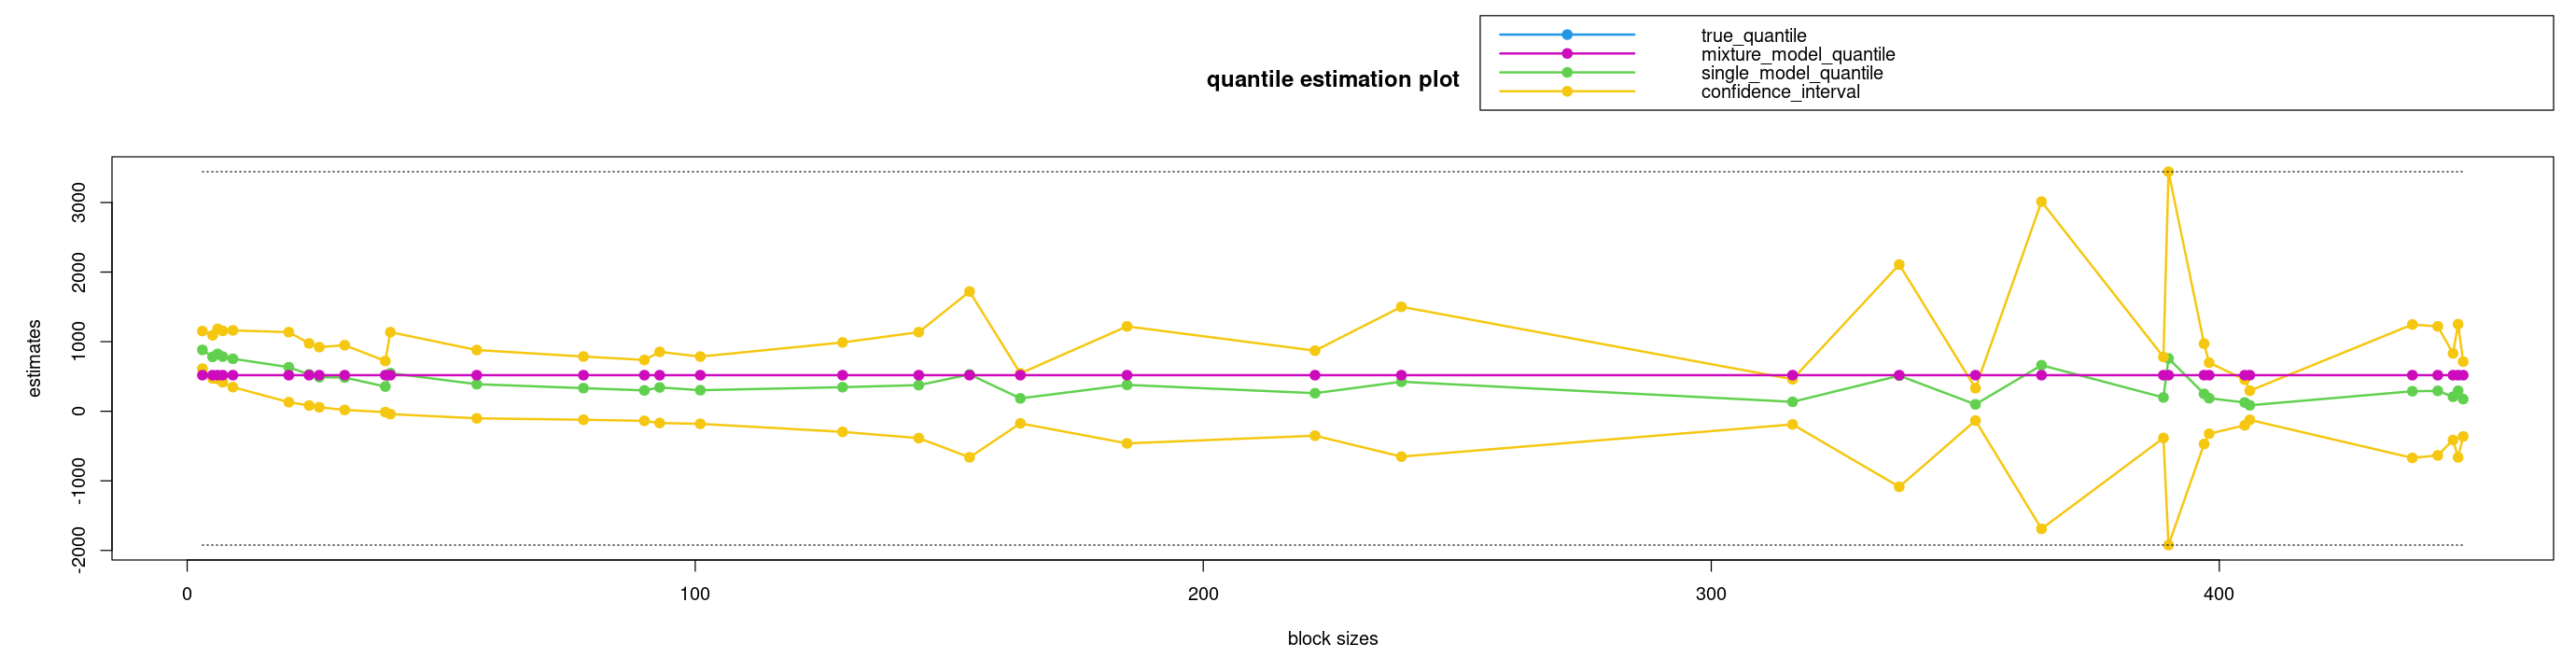

In [76]:
options(repr.plot.width=23, repr.plot.height=6)

plot_estimate_non_stationary_gev_mixture_model_quantile(ns_gev_mixture_model_object,
                                                        alpha = alpha,
                                                        data = NULL,
                                                        data_index = 1,
                                                        true_quantile = NULL,
                                                        do.ci = TRUE,
                                                        confidence_level = 0.95,
                                                        kind = c("geometric", "arithmetic", "harmonic")[1],
                                                        iterations = 100,
                                                        xlab = "block sizes",
                                                        ylab = "estimates",
                                                        main = "quantile estimation plot",
                                                        legend_position = "topright")
